In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.gridspec as grid
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

data = pd.read_csv("Data\CarPrice_Assignment.csv")

data[['symboling']]=data[['symboling']].astype('category')

data['brandName']=data['CarName'].apply(lambda x:x.split(' ')[0].lower().strip())

data.loc[(data['brandName']=='vw' )| (data['brandName']=='vokswagen'),'brandName']='volkswagen'


data.loc[(data['brandName']=='porcshce')|(data['brandName']=='porsche'),'brandName']='porsche'

data.loc[(data['brandName']=='toyouta' ),'brandName']='toyota'

data_num=data.select_dtypes(include=[np.number])

data_num=data_num.iloc[:,1:]

data_cat=data.select_dtypes(exclude=[np.number])

In [23]:
data_num.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [24]:
data['price']=np.log(data['price'])

In [ ]:
g = sns.pairplot(data_num)
g.map_lower(corrfunc)


g.savefig('scatter2.png', dpi=300)

In [10]:
sns.pairplot?

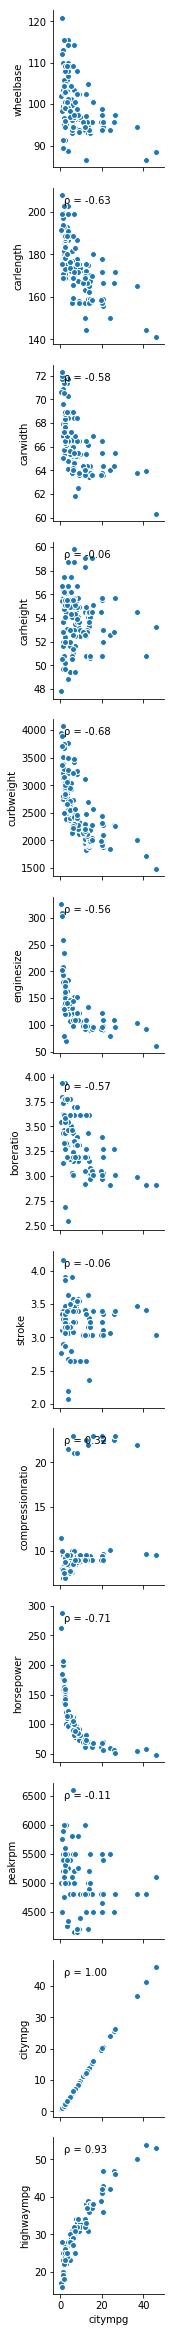

In [20]:
data_num['citympg']=(data_num['citympg'].astype(float)**-2)/data_num['horsepower']
g = sns.pairplot(data_num,x_vars='citympg',y_vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'])
g.map_lower(corrfunc)
plt.show()

# Findings from scatter plot:

<br>1) Wheelbase is highly corelated with car length. It is understandable as wheelbase is length between the axels. if needed we will use a new metric extra length = car length - wheelbase
<br>2) Wheelbase, car length, car width, curb weight are highly corelated. can we come up with better metrics?
<br>3) Car length (and other associated variables) and  engine size are non-linearly corelated
<br>4) Car length and horsepower are non-linearly corelated
<br>5) curb weight and horsepower strong correlation
<br>6) car length (and other associated variables) strongly correlated with citympg and highwaympg
<br>7) horsepower, citympg, highwaympg highly corelated (somewhat nonlinearly)
<br>8) Mild correlation
   <br>a) Engine Size - Bore Ration
    <br>b) bore ratio - mpg variables
    <br>c) car width horsepower
   <br>d) car length (and other associated variables) with other 
<br>9) stoke, car height, peak rpm have correlation with price (dependent) and other independent variables
<br>10) as expected, both mpg variable are strongly corelated. we should take harmonic mean to get to an average value.
<br>11) wheelbase has +ve correlation with price, but mild. may need some transformation as variable is right skewed
<br>12) car length has moderately strong nonlinear relation with price. same for car width
<br>13) mpgs have high nonlinear relation with y
<br>14) bore ratio has mild correlation with y but during univariate analysis we say two peaks. may by including categorical <br>variable it improves
<br>15) horse power has strong correlation with y. but with funnel may need transformation
<br>16) engine size strongly corelated with price


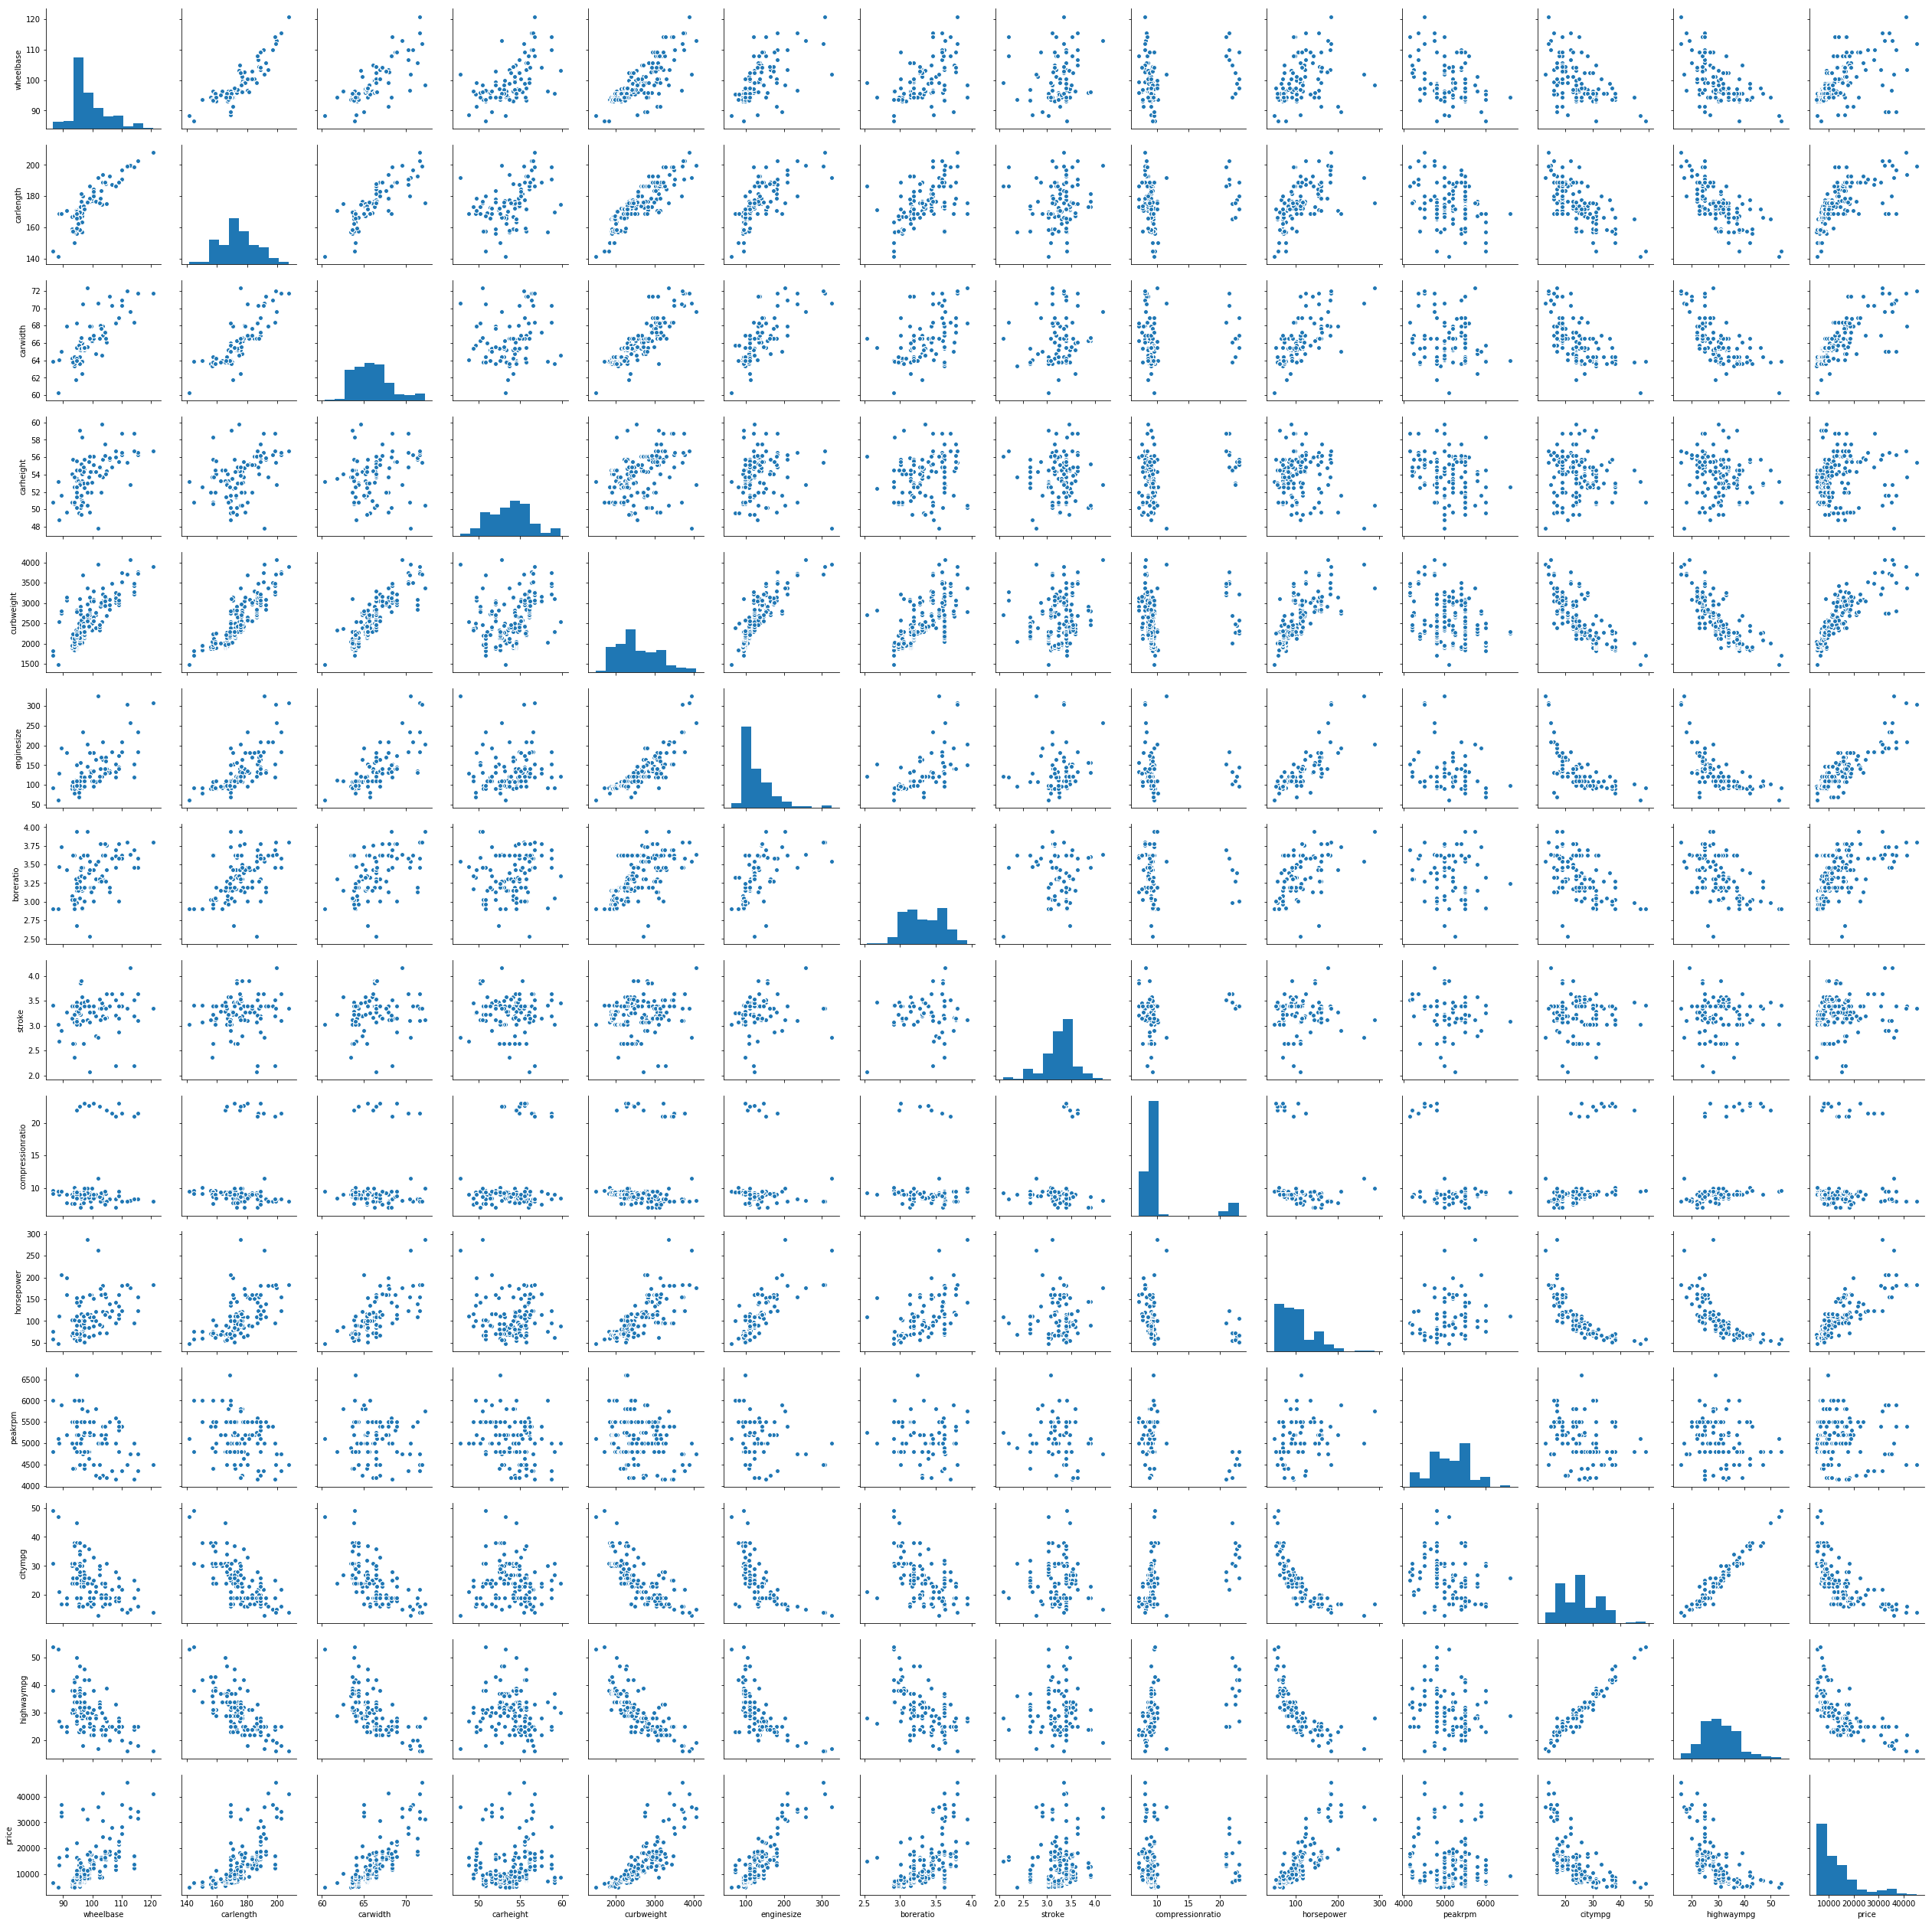

In [25]:
sns.pairplot(data_num)
plt.show()

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


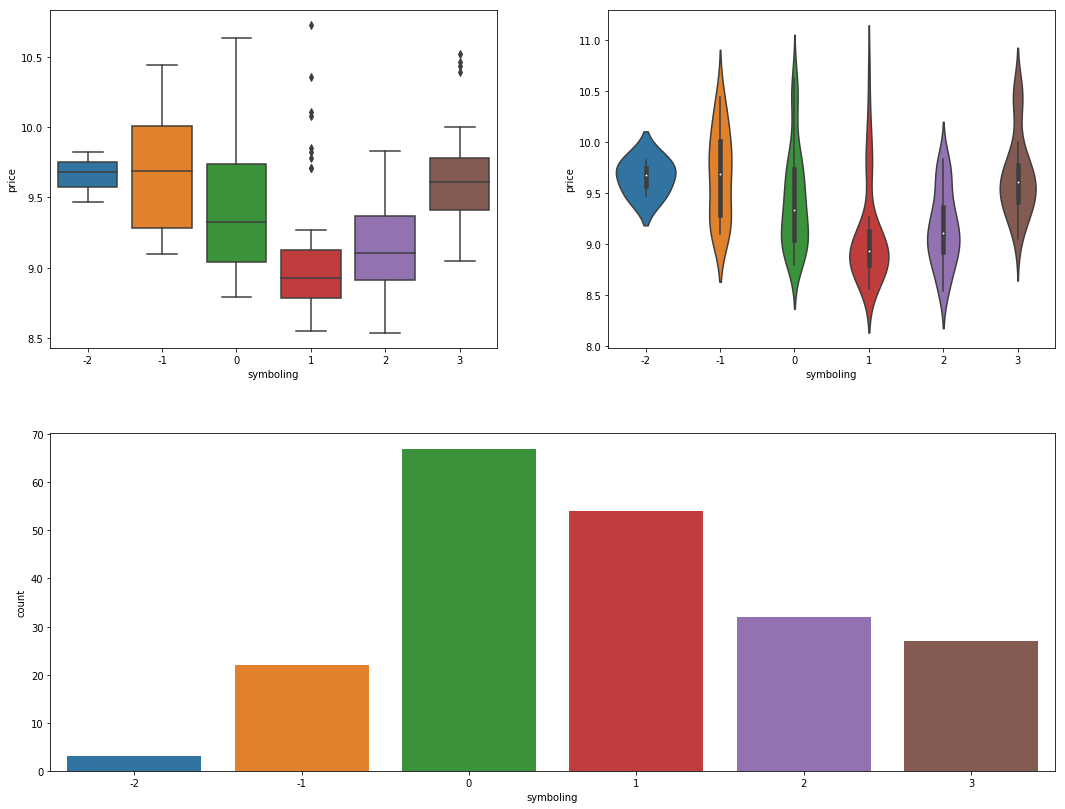

In [26]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='symboling', y='price',ax=ax0)
sns.violinplot(data = data, x='symboling', y='price',ax=ax1)
sns.countplot(data=data,x='symboling',ax=ax2)
plt.show()

In [27]:
def symboling_group(x):
    
    if(int(x) in [-2,-1]):
        return 'level-1_-2'
    else:
        return str(x)
data['symboling']=data['symboling'].apply(lambda x:symboling_group(x))

In [28]:
data['symboling'].value_counts()

0             67
1             54
2             32
3             27
level-1_-2    25
Name: symboling, dtype: int64

Symboling corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.
-1,-2 are quite same
rest groups are different

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


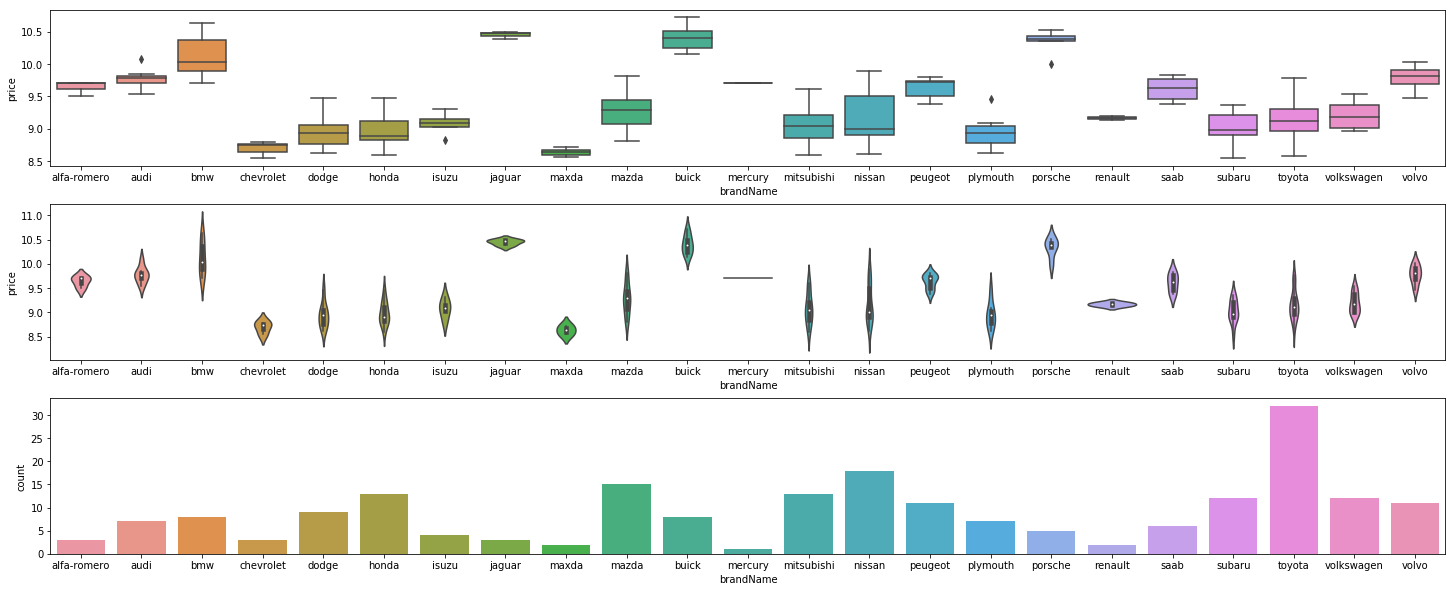

In [29]:
fig = plt.figure(figsize=(25, 10))
gs = grid.GridSpec(3, 1, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])
ax2 = fig.add_subplot(gs[2,:])
sns.boxplot(data = data, x='brandName', y='price',ax=ax0)
sns.violinplot(data = data, x='brandName', y='price',ax=ax1)
sns.countplot(data=data,x='brandName',ax=ax2)
plt.show()

In [30]:
def boxplot_sorted(df, by, column):
  df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df2.mean().sort_values()
  df2[meds.index].boxplot(rot=90)

In [31]:
data['lnprice']=np.log(data['price'])

In [32]:
data['brandName']=data['brandName'].apply(lambda x:'mazda' if x=='maxda' else x)

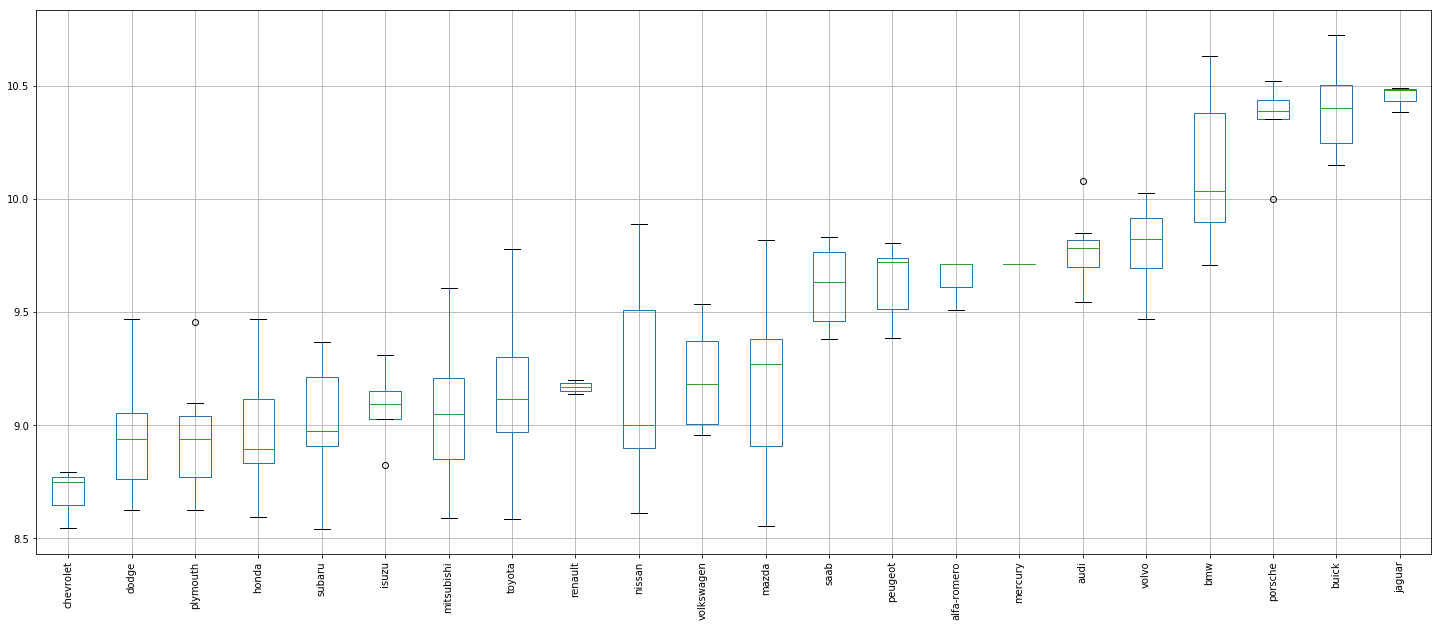

In [33]:
fig = plt.figure(figsize=(25, 10))
boxplot_sorted(data, by=["brandName"], column="price")

In [34]:
data['brandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [35]:
def brand_group(x):
    entry_level=['chevrolet','dodge','plymouth','honda','subaru','isuzu','mitsubishi','renault','toyota','nissan','mazda','volkswagen']
    mid_level=['saab','peugeot','alfa-romero','mercury','audi','volvo','bmw']
    high_end=['porsche','buick','jaguar']
    
    if(x in entry_level):
        return 'entry_level'
    elif(x in mid_level):
        return 'mid_level'
    elif(x in high_end):
        return 'high_end'
    else:
        return 'other'


In [36]:
data['brand_group']=data['brandName'].apply(lambda x:brand_group(x))

In [37]:
data['brand_group'].value_counts()

entry_level    142
mid_level       47
high_end        16
Name: brand_group, dtype: int64

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


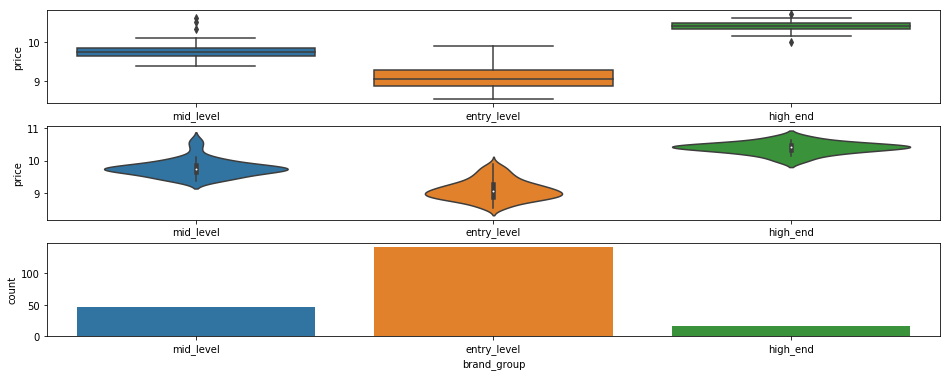

In [38]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(3, 1, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])
ax2 = fig.add_subplot(gs[2,:])
sns.boxplot(data = data, x='brand_group', y='price',ax=ax0)
sns.violinplot(data = data, x='brand_group', y='price',ax=ax1)
sns.countplot(data=data,x='brand_group',ax=ax2)
plt.show()

some cars have high price. as they might be luxury brands

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


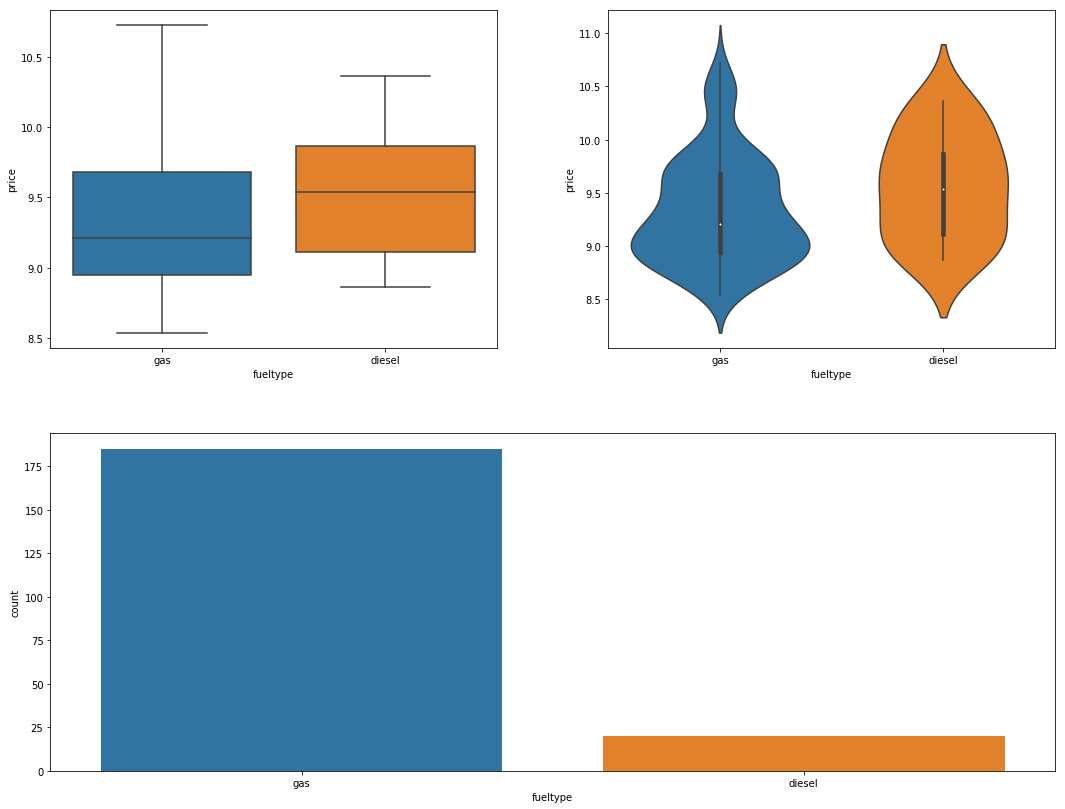

In [39]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='fueltype', y='price',ax=ax0)
sns.violinplot(data = data, x='fueltype', y='price',ax=ax1)
sns.countplot(data=data,x='fueltype',ax=ax2)
plt.show()

Gas and Diesel price level differs but not much. Diesels category dont have much cars.

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


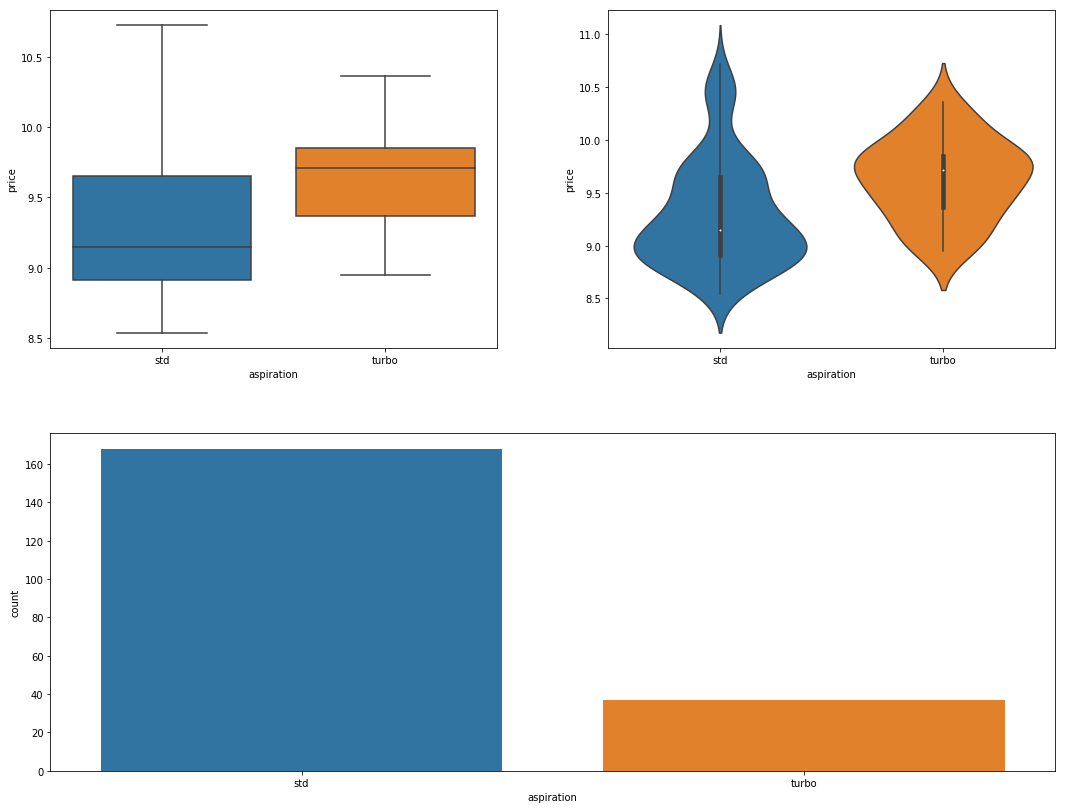

In [40]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='aspiration', y='price',ax=ax0)
sns.violinplot(data = data, x='aspiration', y='price',ax=ax1)
sns.countplot(data=data,x='aspiration',ax=ax2)
plt.show()

Diffenrece in  price for each category is there

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


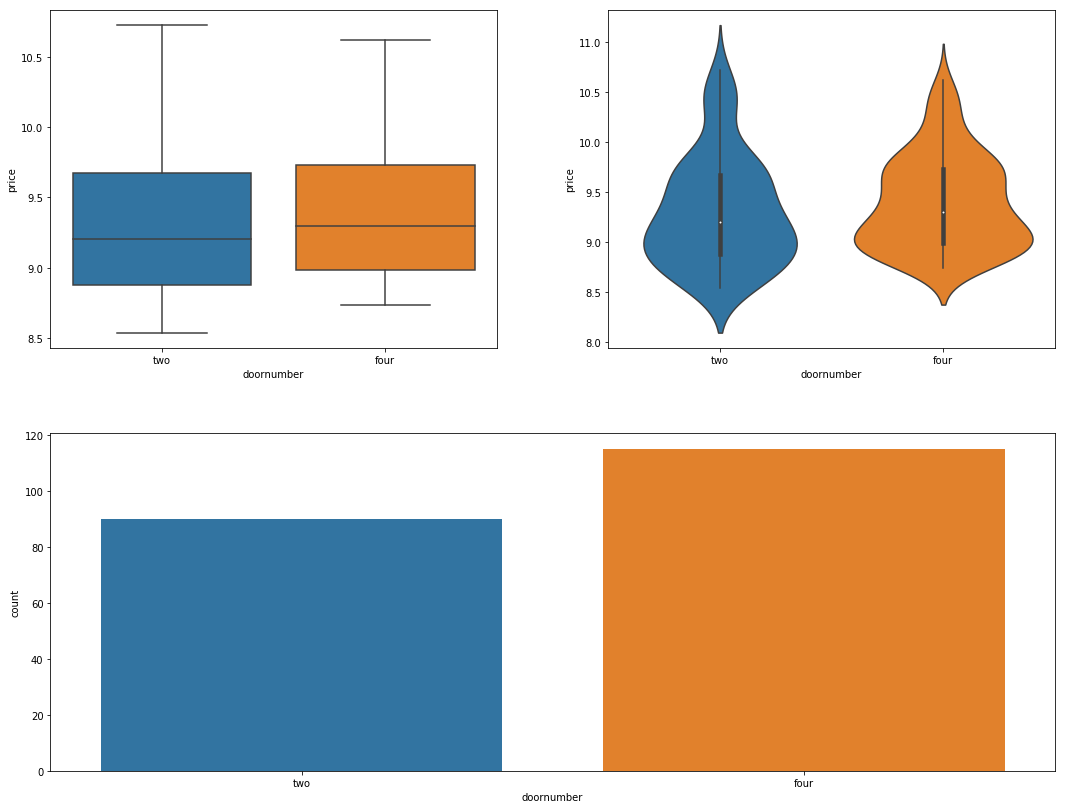

In [41]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='doornumber', y='price',ax=ax0)
sns.violinplot(data = data, x='doornumber', y='price',ax=ax1)
sns.countplot(data=data,x='doornumber',ax=ax2)
plt.show()


Doornumber: not much difference in price.

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


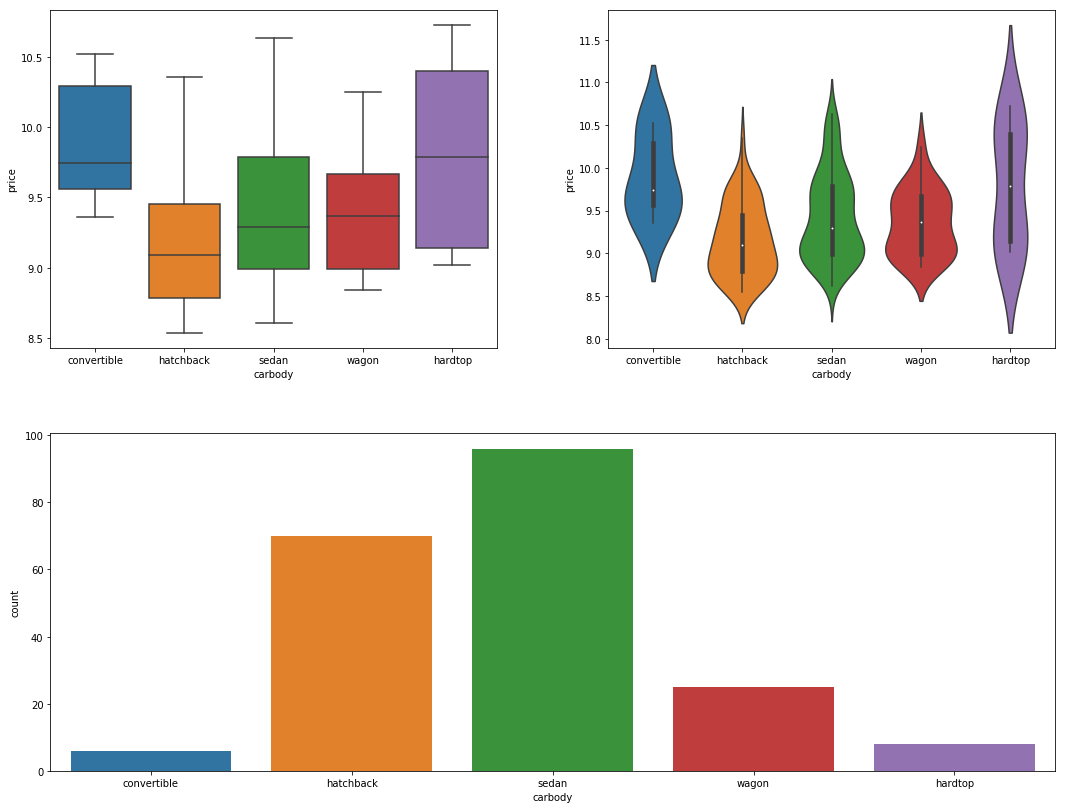

In [42]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='carbody', y='price',ax=ax0)
sns.violinplot(data = data, x='carbody', y='price',ax=ax1)
sns.countplot(data=data,x='carbody',ax=ax2)
plt.show()


Convertiable and hardtop price quite different from the rest

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


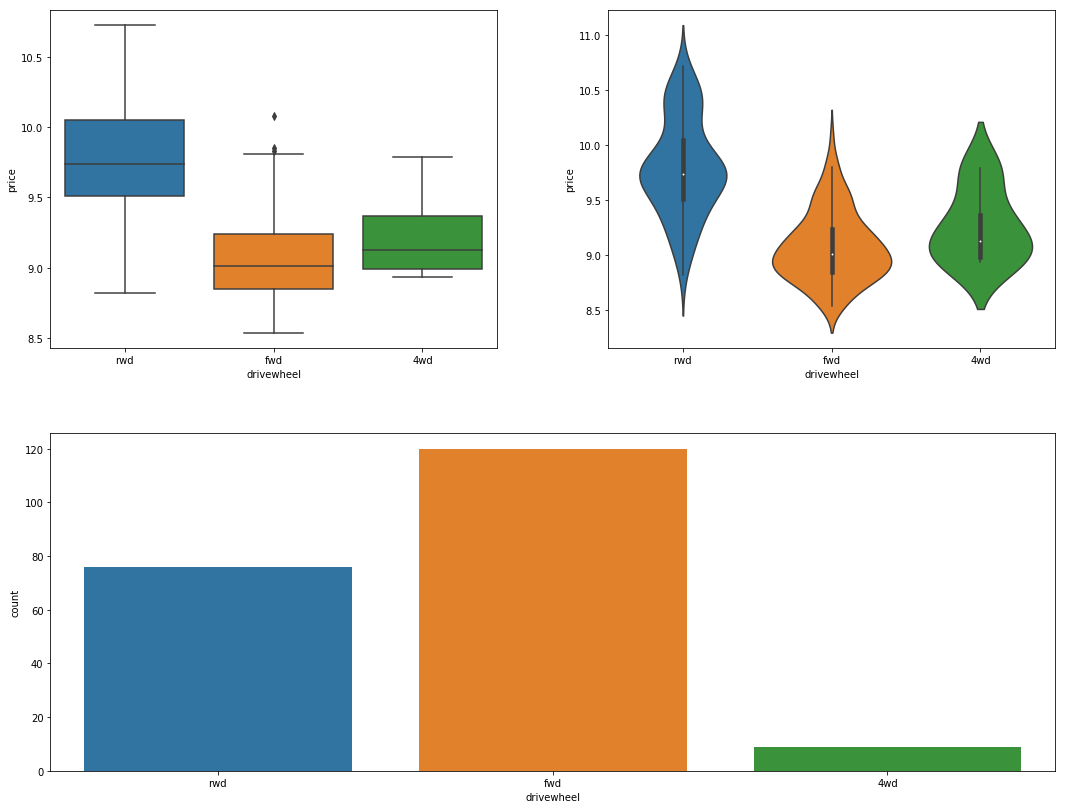

In [43]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='drivewheel', y='price',ax=ax0)
sns.violinplot(data = data, x='drivewheel', y='price',ax=ax1)
sns.countplot(data=data,x='drivewheel',ax=ax2)
plt.show()

rwd is very different from fwd and 4wd

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


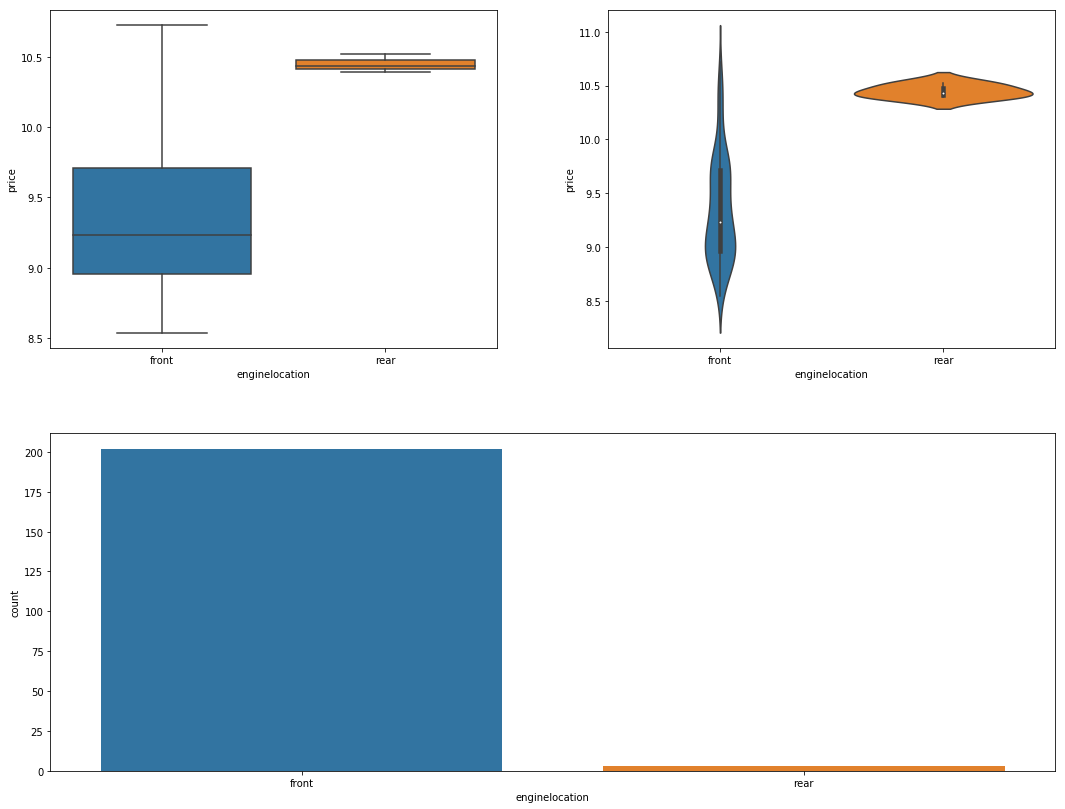

In [44]:


fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='enginelocation', y='price',ax=ax0)
sns.violinplot(data = data, x='enginelocation', y='price',ax=ax1)
sns.countplot(data=data,x='enginelocation',ax=ax2)
plt.show()

only 3 cars in rear that of porche. variable might not be that usable

In [45]:
datax=data[['drivewheel','enginelocation']]

datax['num1']=1

datax.pivot_table(values='num1',index='drivewheel', columns='enginelocation', aggfunc='sum')

C:\Users\prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


enginelocation,front,rear
drivewheel,,
4wd,9.0,NaN
fwd,120.0,NaN
rwd,73.0,3.0


In [46]:

datax=data[['brandName','enginelocation']]
datax['num1']=1

datax.pivot_table(values='num1',index='brandName', columns='enginelocation', aggfunc='sum').dropna()

C:\Users\prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


enginelocation,front,rear
brandName,,
porsche,2.0,3.0


In [47]:
data_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName'],
      dtype='object')

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


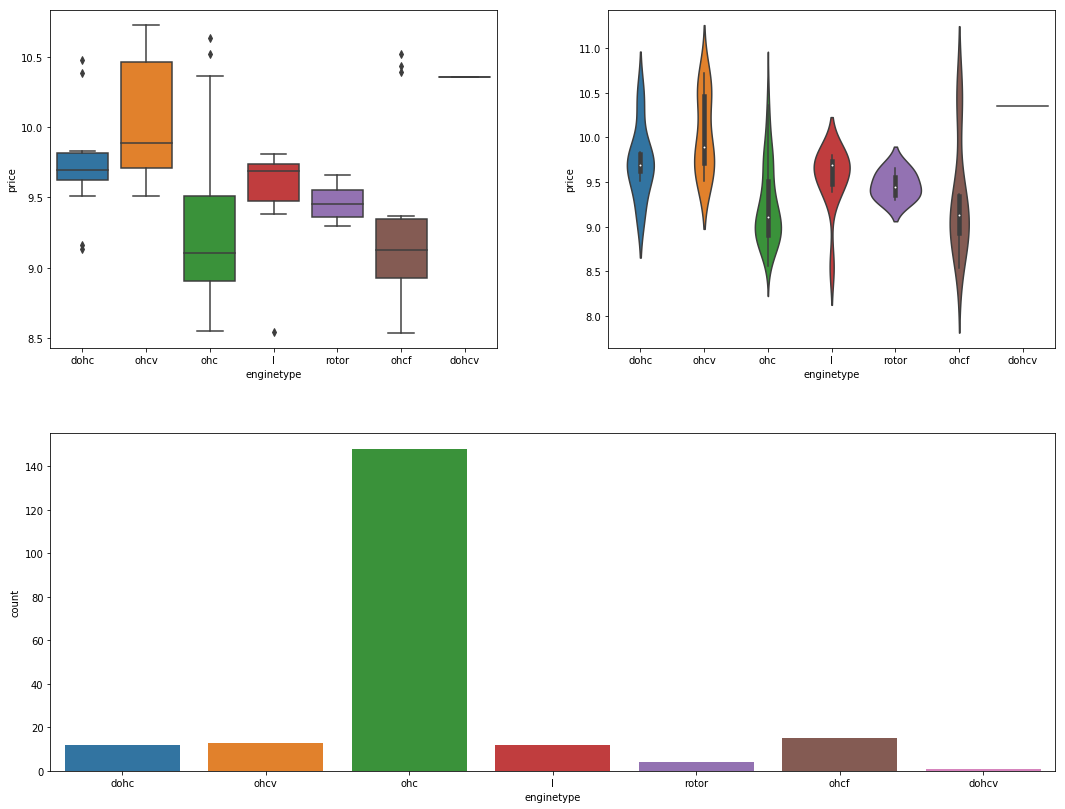

In [48]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='enginetype', y='price',ax=ax0)
sns.violinplot(data = data, x='enginetype', y='price',ax=ax1)
sns.countplot(data=data,x='enginetype',ax=ax2)
plt.show()

In [49]:
def engine_group(x):
    OHC_DOHC=['ohc','dohc']
    OHCV_DOHCV=['ohcv','dohcv']
    
    
    if(x in OHC_DOHC):
        return 'OHC_DOHC'
    elif(x in OHCV_DOHCV):
        return 'OHCV_DOHCV'
    else:
        return x


data['engine_group']=data['enginetype'].apply(lambda x:engine_group(x))

In [50]:
data['engine_group'].value_counts()

OHC_DOHC      160
ohcf           15
OHCV_DOHCV     14
l              12
rotor           4
Name: engine_group, dtype: int64

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


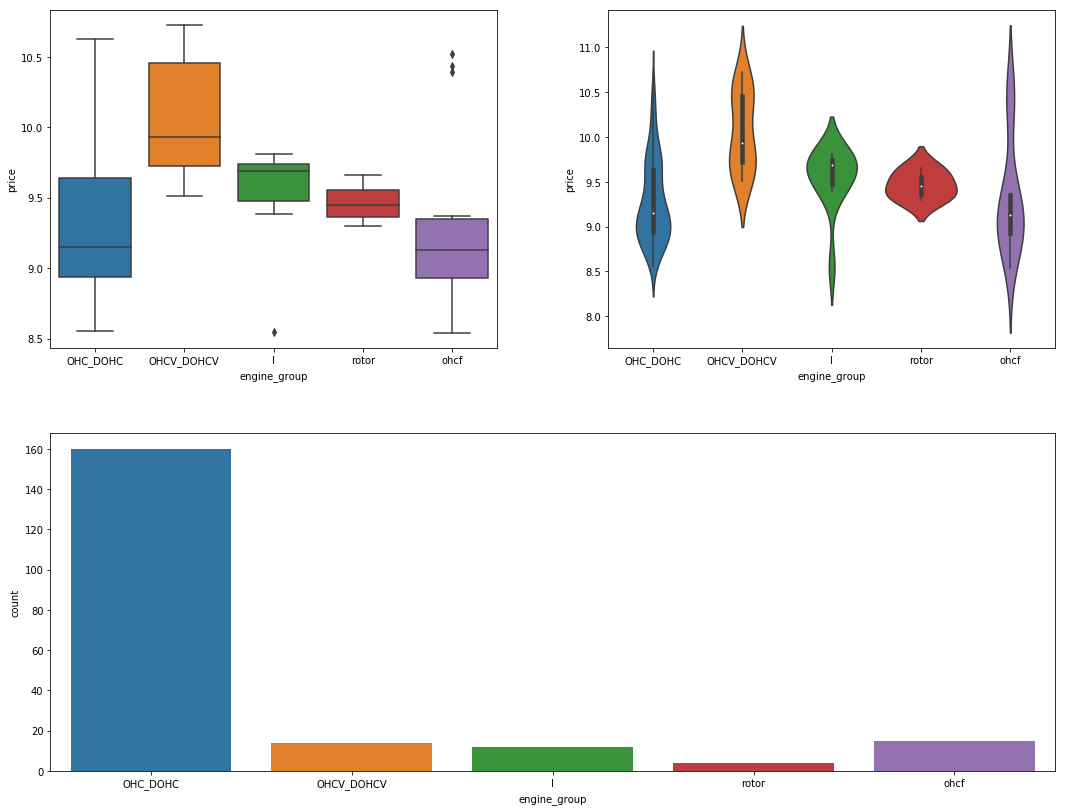

In [51]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='engine_group', y='price',ax=ax0)
sns.violinplot(data = data, x='engine_group', y='price',ax=ax1)
sns.countplot(data=data,x='engine_group',ax=ax2)
plt.show()

In [52]:
## majority of cars are under ohc. though good variation in price is there.

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


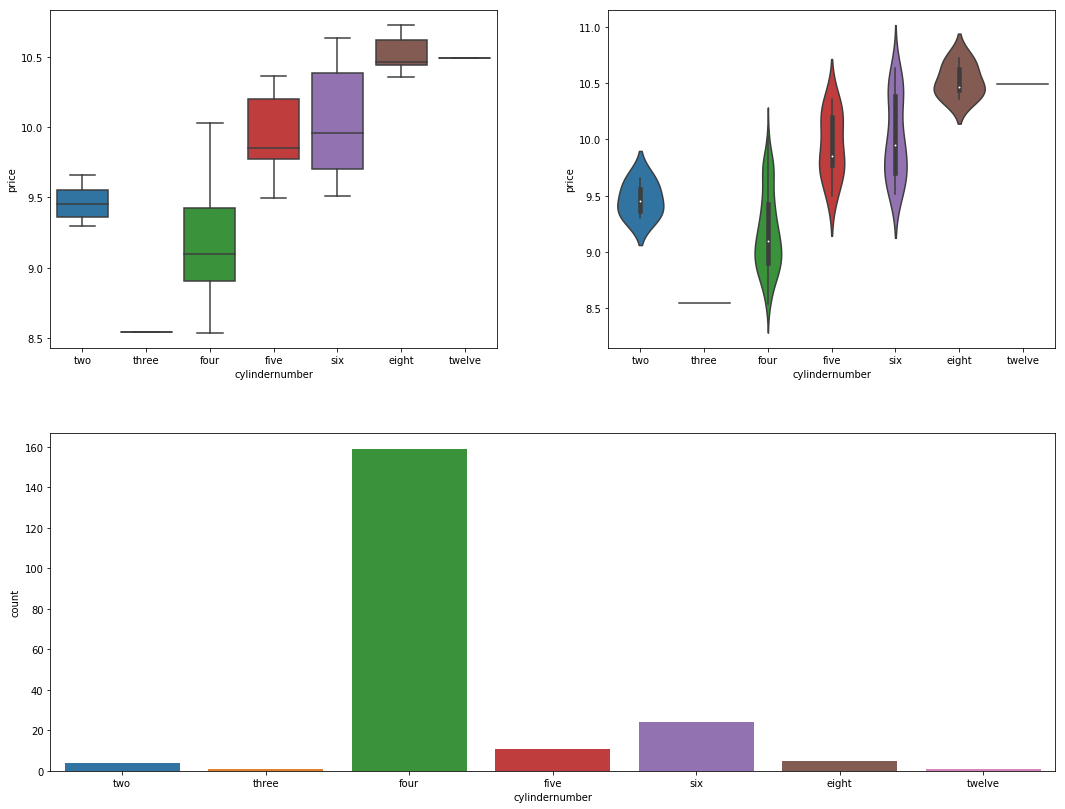

In [53]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='cylindernumber', y='price',ax=ax0,order=['two','three','four','five','six','eight','twelve'])
sns.violinplot(data = data, x='cylindernumber', y='price',ax=ax1,order=['two','three','four','five','six','eight','twelve'])
sns.countplot(data=data,x='cylindernumber',ax=ax2,order=['two','three','four','five','six','eight','twelve'])
plt.show()

In [54]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [55]:
def cylinder_group(x):
    two_three_four=['two','three','four']
    five_six=['five','six']
    eight_twelve=['eight','twelve']
    
    
    if(x in two_three_four):
        return 'two_three_four'
    elif(x in five_six):
        return 'five_six'
    elif(x in eight_twelve):
        return 'eight_twelve'
    else:
        return 'others'


data['cylinder_group']=data['cylindernumber'].apply(lambda x:cylinder_group(x))

In [56]:
data['cylinder_group'].value_counts()

two_three_four    164
five_six           35
eight_twelve        6
Name: cylinder_group, dtype: int64

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


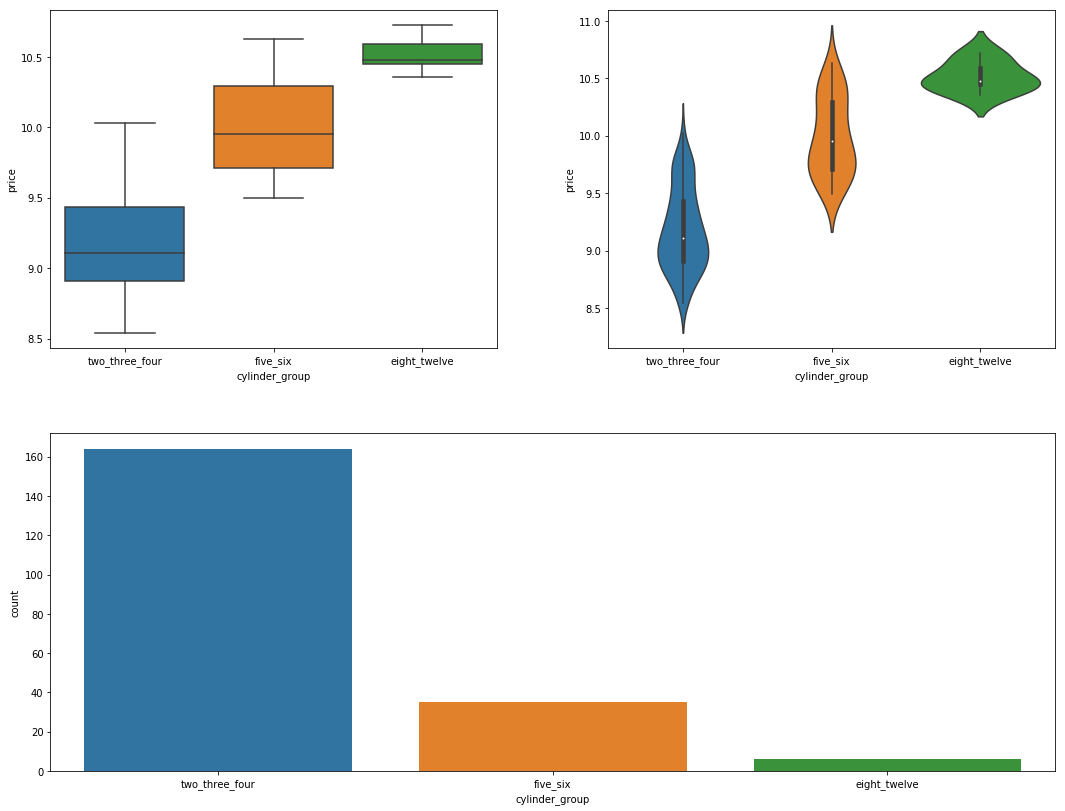

In [57]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='cylinder_group', y='price',ax=ax0,order=['two_three_four','five_six','eight_twelve'])
sns.violinplot(data = data, x='cylinder_group', y='price',ax=ax1,order=['two_three_four','five_six','eight_twelve'])
sns.countplot(data=data,x='cylinder_group',ax=ax2,order=['two_three_four','five_six','eight_twelve'])
plt.show()

majority of cars are under four cylinder. though good variation in price is there. five - six and eight - twelve looks similar

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


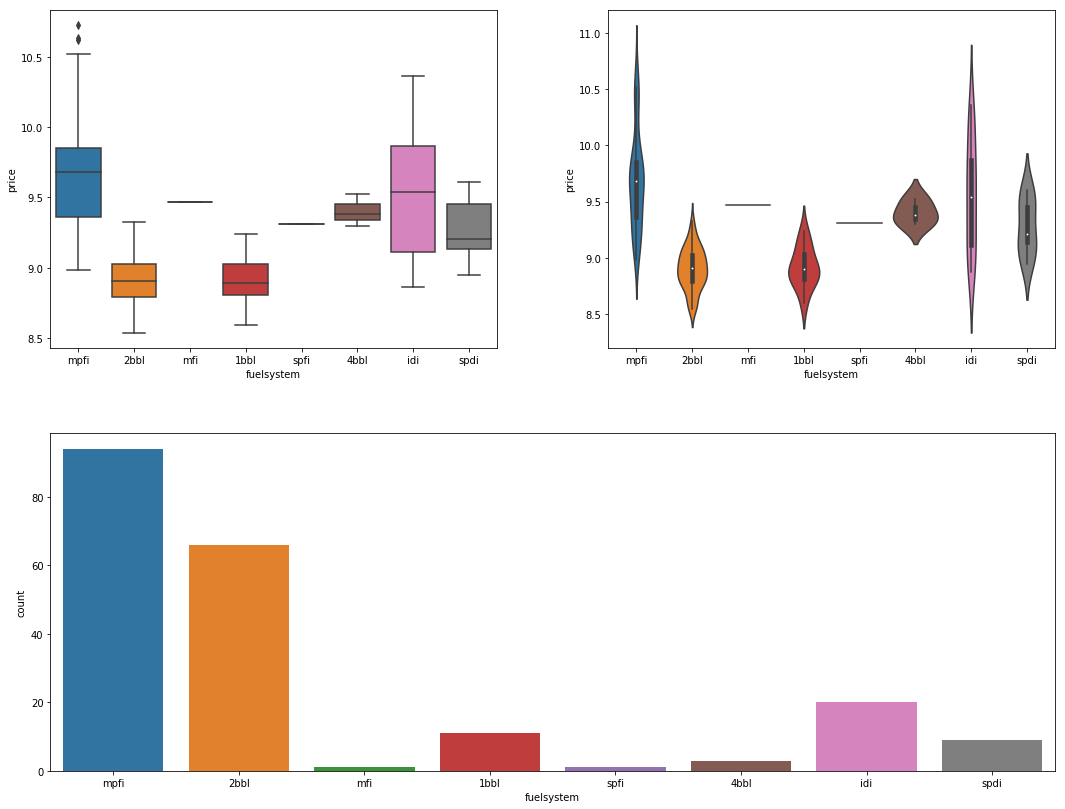

In [58]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='fuelsystem', y='price',ax=ax0,)
sns.violinplot(data = data, x='fuelsystem', y='price',ax=ax1)
sns.countplot(data=data,x='fuelsystem',ax=ax2)
plt.show()

In [59]:
datax=data[['fuelsystem','fueltype']]

datax['num1']=1

datax.pivot_table(values='num1',index='fuelsystem', columns='fueltype', aggfunc='sum')

C:\Users\prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


fueltype,diesel,gas
fuelsystem,,
1bbl,NaN,11.0
2bbl,NaN,66.0
4bbl,NaN,3.0
idi,20.0,NaN
mfi,NaN,1.0
mpfi,NaN,94.0
spdi,NaN,9.0
spfi,NaN,1.0


In [60]:
def fuelsystem_group(x):
    bbl1_2=['1bbl','2bbl','four']
    mpfi_s=['mfi','mpfi','spfi']
    bbl4_spdi=['4bbl','spdi']
    
    
    if(x in bbl1_2):
        return 'bbl1_2'
    elif(x in mpfi_s):
        return 'mpfi_s'
    elif(x in bbl4_spdi):
        return 'bbl4_spdi'
    else:
        return x


data['fuelsystem_g']=data['fuelsystem'].apply(lambda x:fuelsystem_group(x))

C:\Users\prateek\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


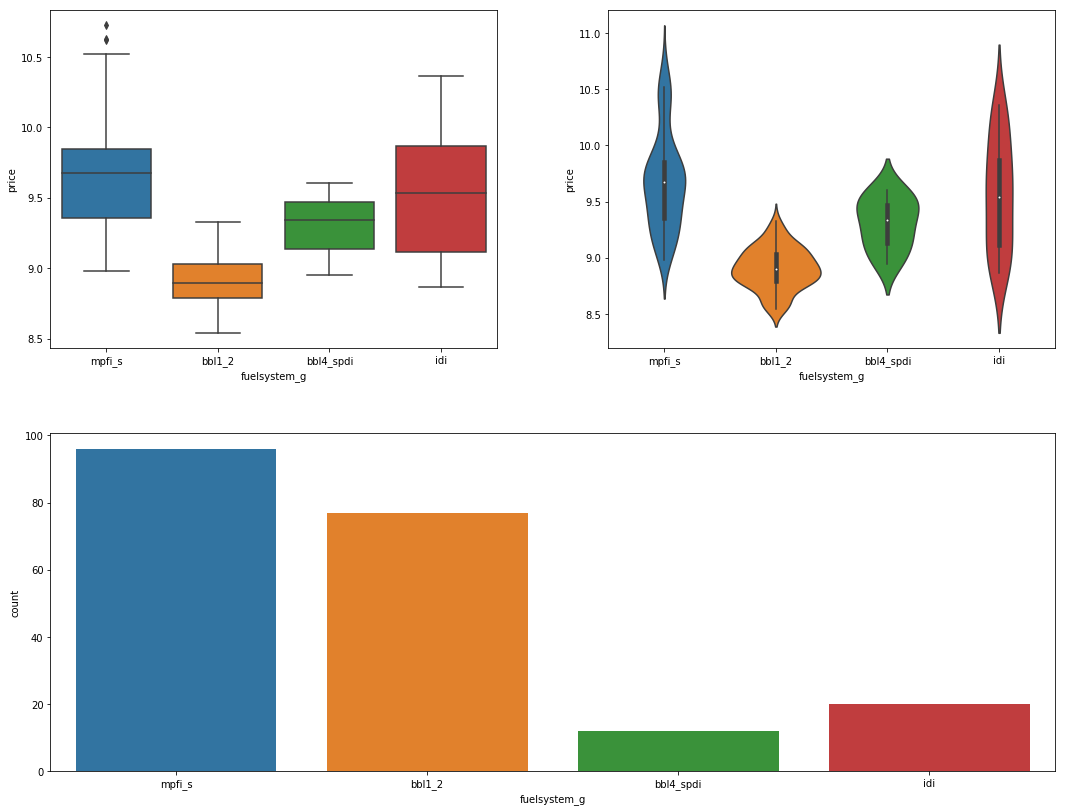

In [61]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])
sns.boxplot(data = data, x='fuelsystem_g', y='price',ax=ax0,)
sns.violinplot(data = data, x='fuelsystem_g', y='price',ax=ax1)
sns.countplot(data=data,x='fuelsystem_g',ax=ax2)
plt.show()

good variation among the variables.

lets create two new variables scatter plot for diesel and petrol vehicles seperately. This will also give indication about coprssion ratio metrics

C:\Users\prateek\Anaconda3\lib\site-packages\matplotlib\axis.py:1096: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


SystemError: <built-in method write of _io.BufferedWriter object at 0x0000014F3802CEB8> returned a result with an error set

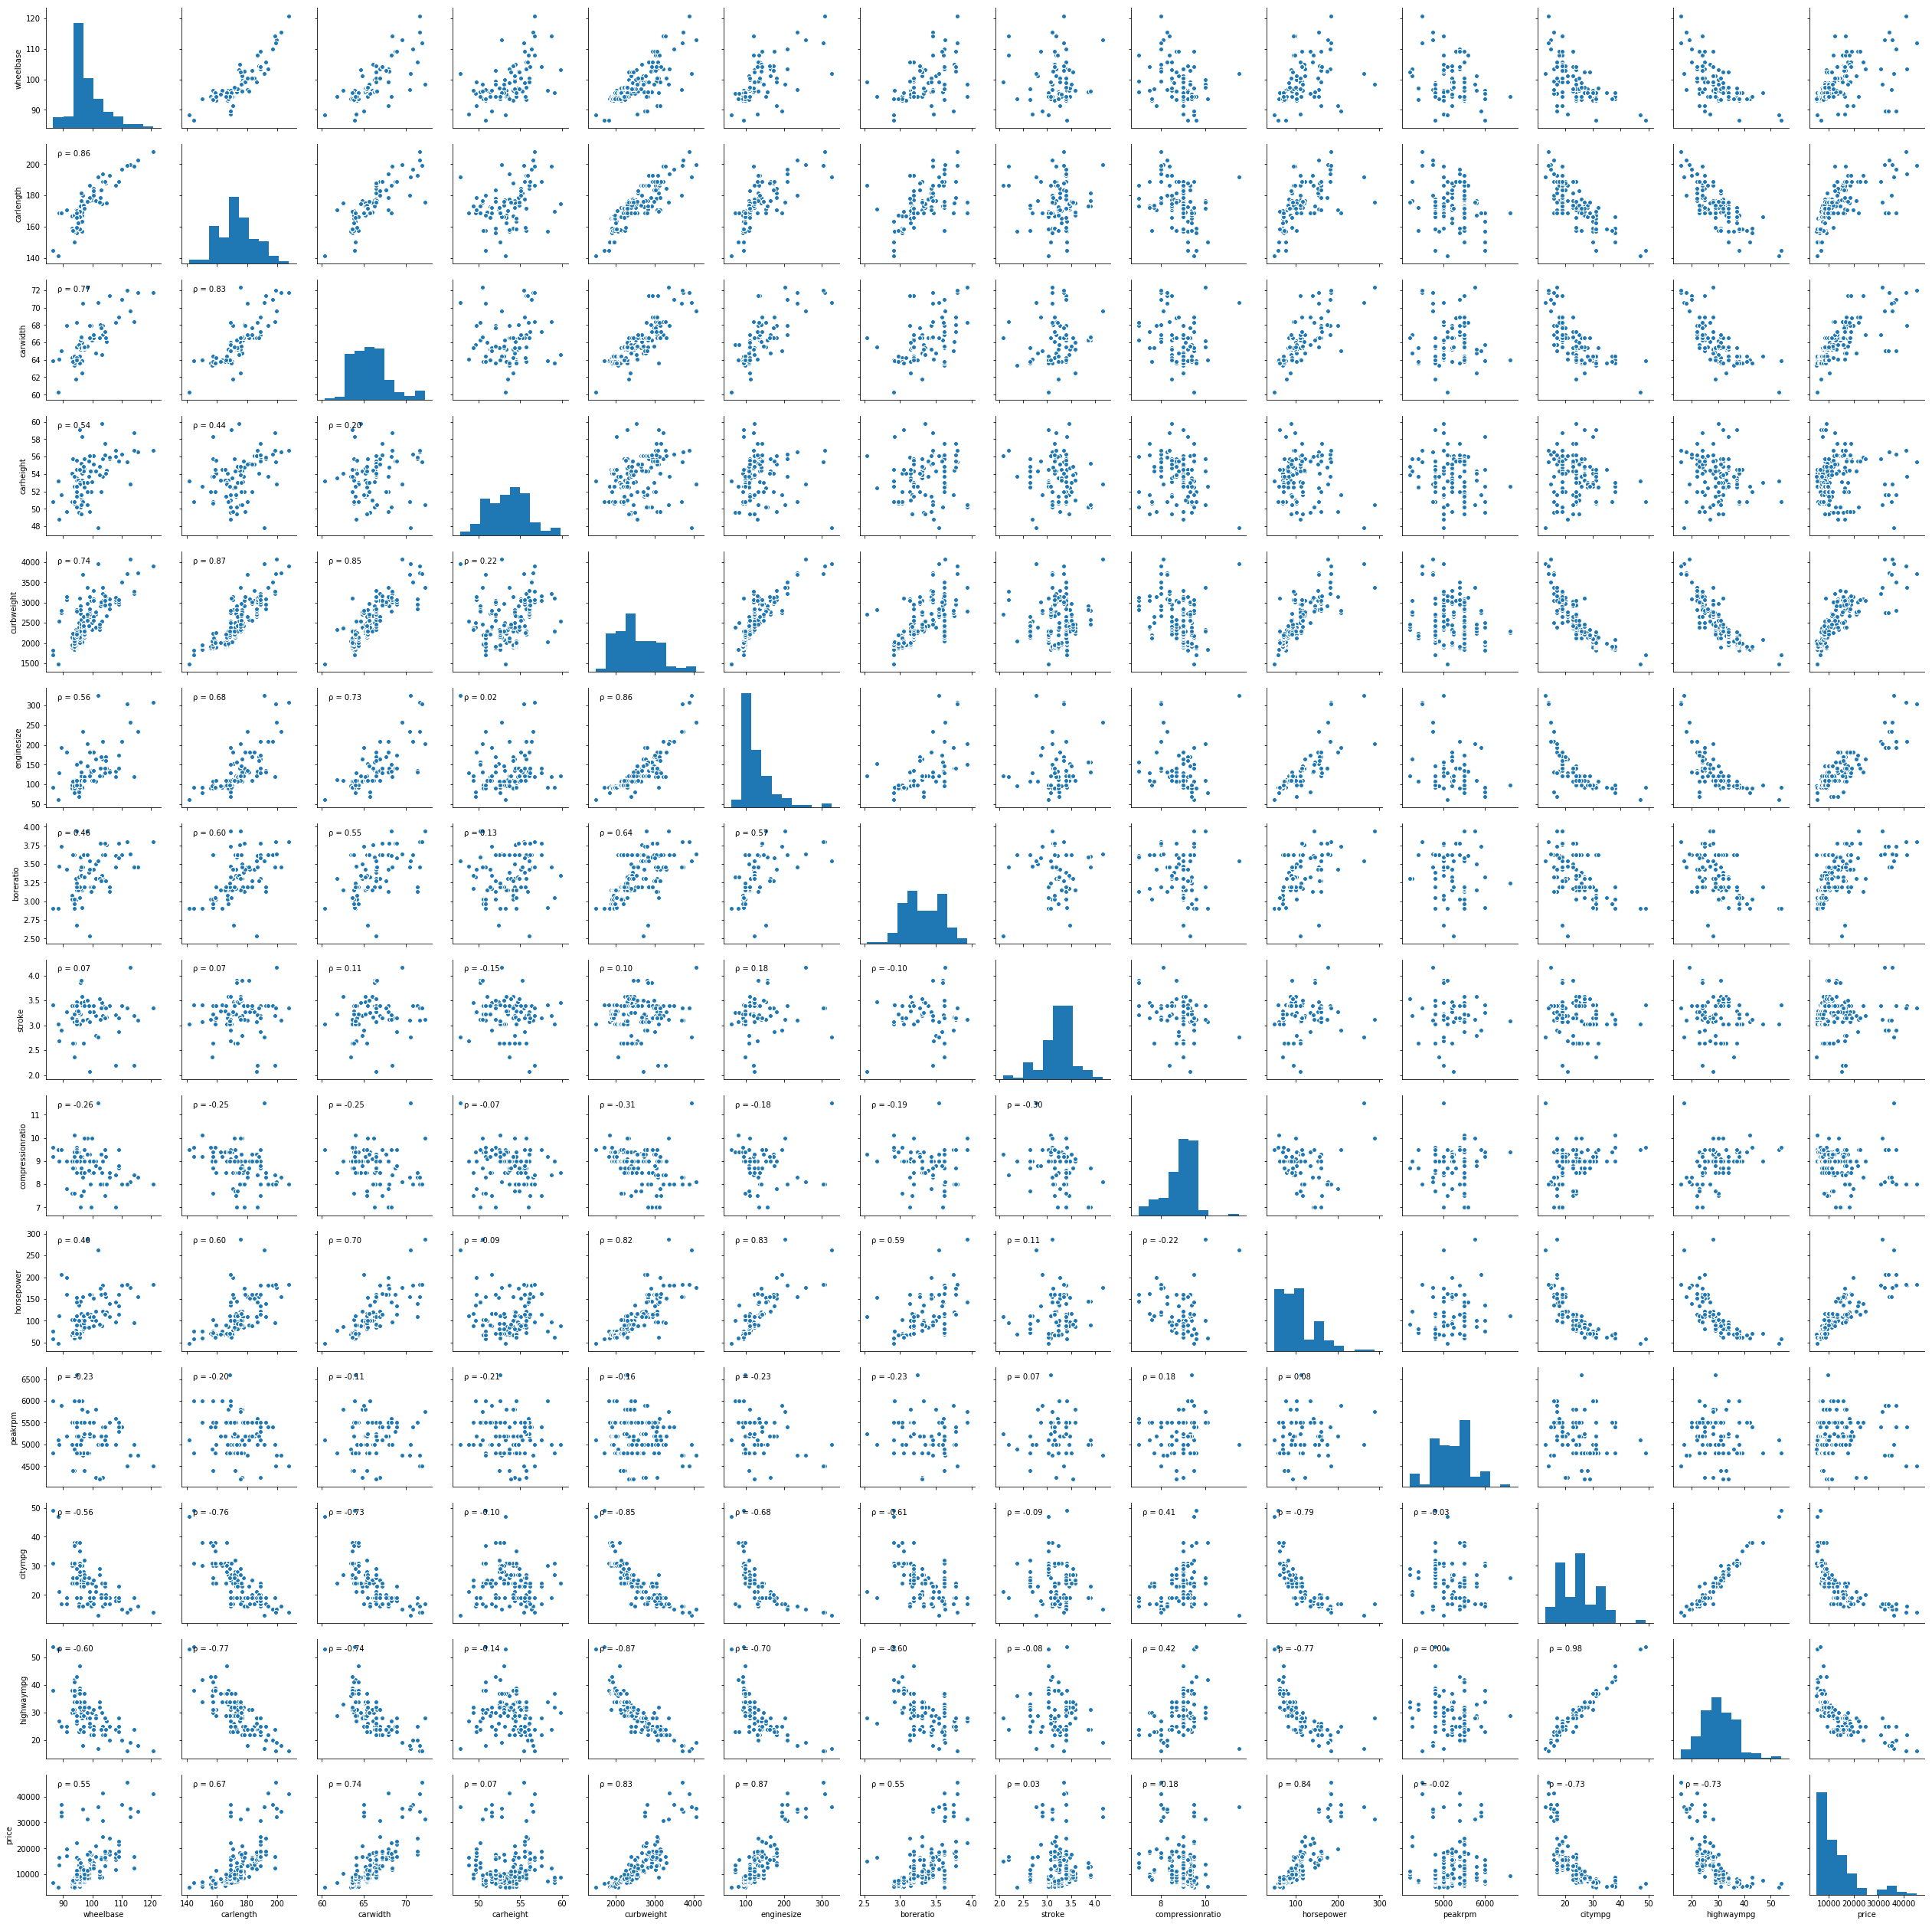

In [62]:
g = sns.pairplot(data_num[data_cat['fueltype']=='gas'])
g.map_lower(corrfunc)


g.savefig('scatter_gas.png', dpi=300)

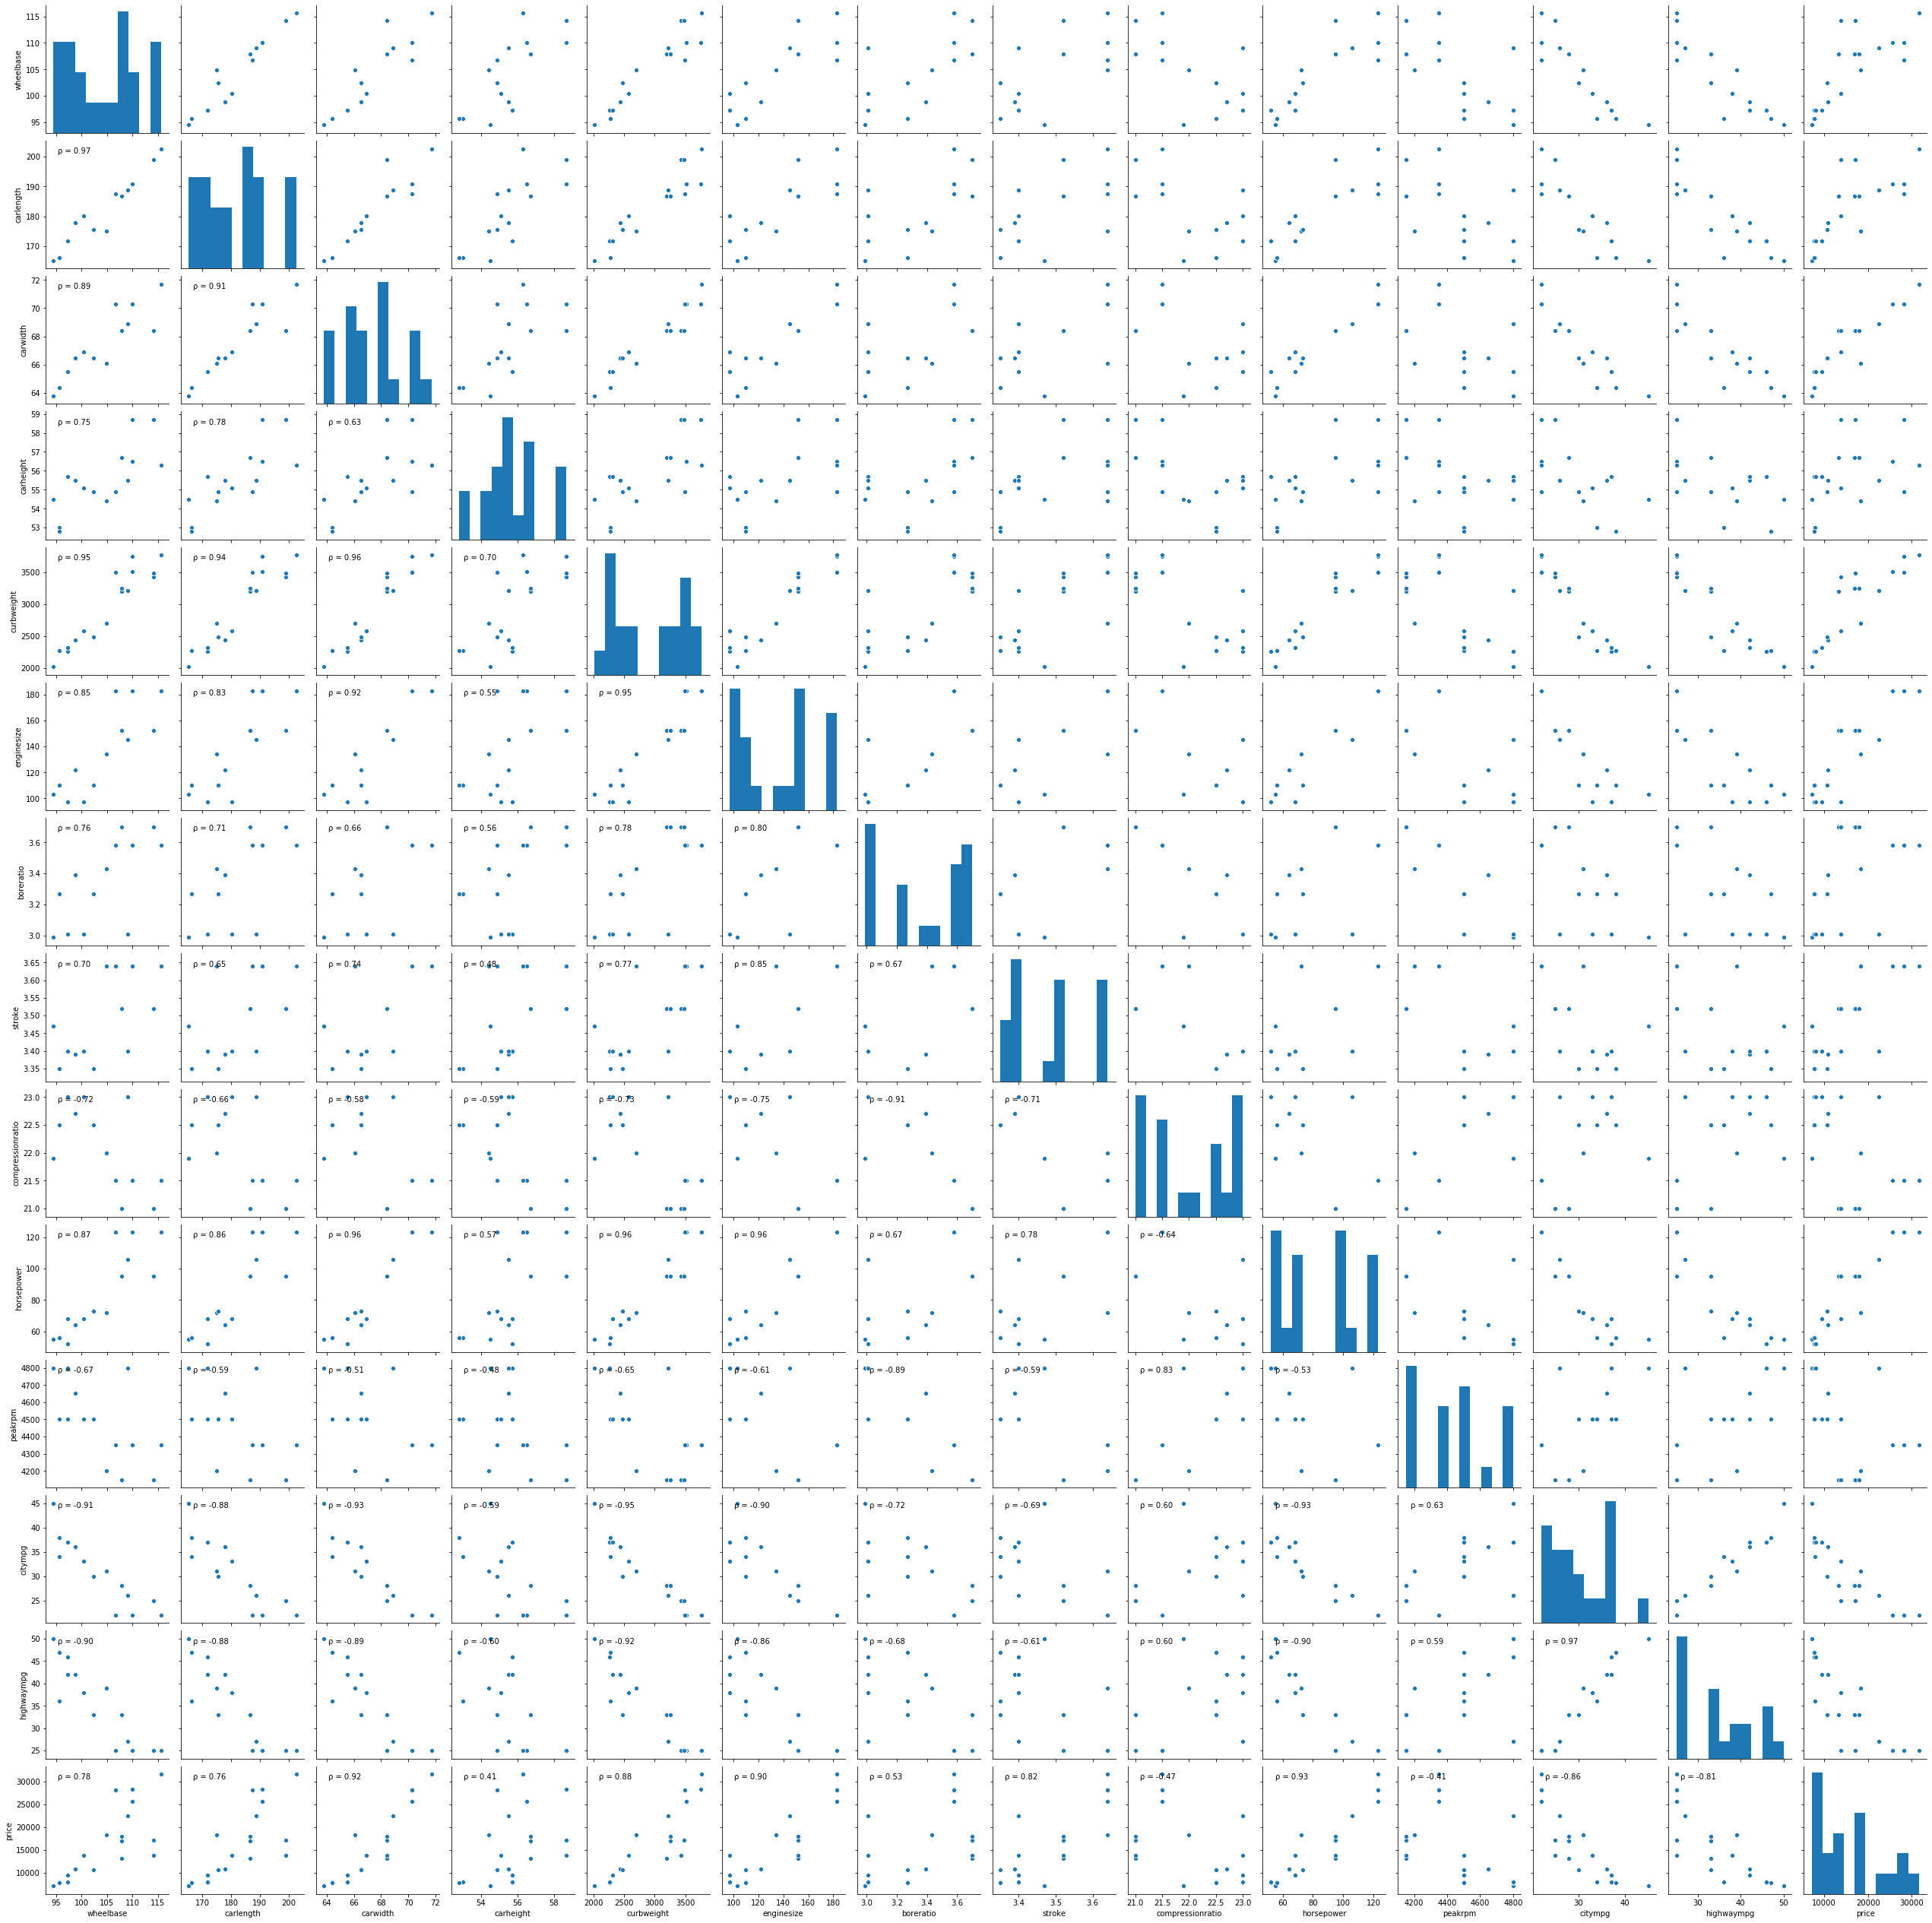

In [19]:
g = sns.pairplot(data_num[data_cat['fueltype']=='diesel'])
g.map_lower(corrfunc)


g.savefig('scatter_diesel.png', dpi=300)

### by analysis above scatterplots we can say the comression ration is weakly corelated with y. we might need an interaction varaible between comression ratio and fuel type

In [20]:
data1 = pd.concat([data_cat,data_num],axis=1)

In [21]:
data1.shape

(205, 26)

In [22]:
data1.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [23]:
data_final =data1[['symboling','fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']]

In [24]:
data_final.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
data_final.iloc[:,24:25]

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [25]:
data_final.to_csv('Data/data_cleaned.csv')

In [26]:
from sklearn.model_selection import train_test_split


In [31]:
data_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_final, test_size=0.20)

In [45]:
train.loc[:,'symboling':'brandName'].apply(lambda x:len(x.unique()))

symboling          6
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     6
fuelsystem         8
brandName         23
dtype: int64

In [47]:
data_final.loc[:,'symboling':'brandName'].apply(lambda x:len(x.unique()))==train.loc[:,'symboling':'brandName'].apply(lambda x:len(x.unique()))

symboling          True
fueltype           True
aspiration         True
doornumber         True
carbody            True
drivewheel         True
enginelocation     True
enginetype         True
cylindernumber    False
fuelsystem         True
brandName          True
dtype: bool

## We need to have all sample in training there cylinder number is a problem. lets check which cylinder number is missing and we will puth that in training and remove test

In [48]:
train['cylindernumber'].unique()

array(['four', 'six', 'five', 'two', 'eight', 'three'], dtype=object)

In [49]:
#twelve is missing

In [53]:
train = pd.concat([train,test[test['cylindernumber']=='twelve']],axis=0)

In [56]:
test = test[test['cylindernumber']!='twelve']

In [57]:
train.to_csv('Data/data_train.csv')
test.to_csv('Data/data_test.csv')

In [124]:
data.iloc[4,]

car_ID                       5
symboling                    2
CarName             audi 100ls
fueltype                   gas
aspiration                 std
doornumber                four
carbody                  sedan
drivewheel                 4wd
enginelocation           front
wheelbase                 99.4
carlength                176.6
carwidth                  66.4
carheight                 54.3
curbweight                2824
enginetype                 ohc
cylindernumber            five
enginesize                 136
fuelsystem                mpfi
boreratio                 3.19
stroke                     3.4
compressionratio             8
horsepower                 115
peakrpm                   5500
citympg                     18
highwaympg                  22
price                    17450
brandName                 audi
lnprice                9.76709
brand_group          mid_level
engine_group          OHC_DOHC
cylinder_group        five_six
fuelsystem_g            mpfi_s
Name: 4,

In [100]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'brandName', 'lnprice', 'brand_group', 'engine_group',
       'cylinder_group', 'fuelsystem_g'],
      dtype='object')

In [71]:
train=pd.read_csv('Data/data_train.csv',index_col=0)
test=pd.read_csv('Data/data_test.csv',index_col=0)

In [72]:
train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
100,0,gas,std,four,sedan,fwd,front,OHC_DOHC,two_three_four,bbl1_2,...,2302,120,3.33,3.47,8.5,97,5200,27,34,9549.0
151,1,gas,std,two,hatchback,fwd,front,OHC_DOHC,two_three_four,bbl1_2,...,2040,92,3.05,3.03,9.0,62,4800,31,38,6338.0
163,1,gas,std,two,sedan,rwd,front,OHC_DOHC,two_three_four,bbl1_2,...,2169,98,3.19,3.03,9.0,70,4800,29,34,8058.0
146,0,gas,std,four,wagon,fwd,front,ohcf,two_three_four,bbl1_2,...,2290,108,3.62,2.64,9.0,82,4800,28,32,7463.0
16,0,gas,std,two,sedan,rwd,front,OHC_DOHC,five_six,mpfi_s,...,3380,209,3.62,3.39,8.0,182,5400,16,22,41315.0


In [130]:
train['brandName']=train['brandName'].apply(lambda x:'mazda' if x=='maxda' else x)
test['brandName']=test['brandName'].apply(lambda x:'mazda' if x=='maxda' else x)

In [131]:
train['brandName']=train['brandName'].apply(lambda x:brand_group(x))
train['symboling']=train['symboling'].apply(lambda x:symboling_group(x))
train['enginetype']=train['enginetype'].apply(lambda x:engine_group(x))
train['cylindernumber']=train['cylindernumber'].apply(lambda x:cylinder_group(x))
train['fuelsystem']=train['fuelsystem'].apply(lambda x:fuelsystem_group(x))

In [132]:
train['fuelsystem'].value_counts()

mpfi_s       77
bbl1_2       65
idi          14
bbl4_spdi     9
Name: fuelsystem, dtype: int64

In [133]:
test['brandName']=test['brandName'].apply(lambda x:brand_group(x))
test['symboling']=test['symboling'].apply(lambda x:symboling_group(x))
test['enginetype']=test['enginetype'].apply(lambda x:engine_group(x))
test['cylindernumber']=test['cylindernumber'].apply(lambda x:cylinder_group(x))
test['fuelsystem']=test['fuelsystem'].apply(lambda x:fuelsystem_group(x))

In [73]:
train=pd.read_csv('Data/data_train2.csv',index_col=0)
test=pd.read_csv('Data/data_test2.csv',index_col=0)

In [76]:
datax=data[['carbody','cylinder_group']]

datax['num1']=1

datax.pivot_table(values='num1',index='carbody', columns='cylinder_group', aggfunc='sum')

C:\Users\prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


cylinder_group,eight_twelve,five_six,two_three_four
carbody,,,
convertible,1.0,1.0,4.0
hardtop,1.0,3.0,4.0
hatchback,1.0,7.0,62.0
sedan,3.0,20.0,73.0
wagon,NaN,4.0,21.0


In [74]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [ ]:
def symboling_group(x):
    
    if(int(x) in [-2,-1]):
        return 'level-1_-2'
    else:
        return str(x)
data['carbody']=data['symboling'].apply(lambda x:symboling_group(x))

In [134]:
train.to_csv('Data/data_train2.csv')
test.to_csv('Data/data_test2.csv')

In [135]:
train.iloc[4,]

symboling                   0
fueltype                  gas
aspiration                std
doornumber                two
carbody                 sedan
drivewheel                rwd
enginelocation          front
enginetype           OHC_DOHC
cylindernumber       five_six
fuelsystem             mpfi_s
brandName           mid_level
wheelbase               103.5
carlength               193.8
carwidth                 67.9
carheight                53.7
curbweight               3380
enginesize                209
boreratio                3.62
stroke                   3.39
compressionratio            8
horsepower                182
peakrpm                  5400
citympg                    16
highwaympg                 22
price                   41315
Name: 16, dtype: object

In [137]:
data.iloc[[16,18,74,17],:]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,brandName,lnprice,brand_group,engine_group,cylinder_group,fuelsystem_g
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,5400,16,22,41315.0,bmw,10.628981,mid_level,OHC_DOHC,five_six,mpfi_s
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,5100,47,53,5151.0,chevrolet,8.546946,entry_level,l,two_three_four,bbl1_2
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,4500,14,16,45400.0,buick,10.723267,high_end,OHCV_DOHCV,eight_twelve,mpfi_s
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,5400,15,20,36880.0,bmw,10.515425,mid_level,OHC_DOHC,five_six,mpfi_s


In [138]:
data_num.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [141]:
data.iloc[[71,74,125,129],:].describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,lnprice
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,100.75000,105.125000,186.600000,71.075000,53.150000,3399.750000,223.000000,3.785000,3.167500,8.950000,192.500000,5125.000000,16.500000,22.250000,33250.625000,10.379244
std,31.53173,10.248699,16.801389,1.866146,3.266497,448.279953,63.942683,0.226495,0.121758,0.953939,65.952003,595.119036,2.081666,6.130525,9627.622217,0.298167
min,72.00000,94.500000,168.900000,68.300000,50.200000,2778.000000,151.000000,3.460000,3.100000,8.000000,143.000000,4500.000000,14.000000,16.000000,22018.000000,9.999616
25%,74.25000,97.425000,174.000000,70.850000,50.425000,3219.000000,190.000000,3.715000,3.107500,8.225000,152.000000,4687.500000,15.500000,17.500000,29054.875000,10.265838
50%,100.50000,105.200000,187.450000,71.850000,52.950000,3540.500000,218.500000,3.870000,3.110000,8.900000,169.500000,5125.000000,16.500000,22.500000,32792.250000,10.397046
75%,127.00000,112.900000,200.050000,72.075000,55.675000,3721.250000,251.500000,3.940000,3.170000,9.625000,210.000000,5562.500000,17.500000,27.250000,36988.000000,10.510452
max,130.00000,115.600000,202.600000,72.300000,56.500000,3740.000000,304.000000,3.940000,3.350000,10.000000,288.000000,5750.000000,19.000000,28.000000,45400.000000,10.723267


In [144]:
data[data['brand_group']=='high_end'].describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,lnprice
count,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.0000,16.00000,16.000000
mean,84.937500,104.800000,187.76875,69.618750,53.418750,3506.750000,224.375000,3.671250,3.342500,12.14375,177.250000,4959.375000,17.375000,22.0625,33123.65625,10.393868
std,31.246266,10.522674,13.96332,2.512958,3.055753,476.969251,52.639497,0.149438,0.437881,5.65520,49.080206,614.062633,3.117157,4.2500,5671.70285,0.175565
min,48.000000,89.500000,168.90000,65.000000,47.800000,2756.000000,151.000000,3.460000,2.760000,8.00000,123.000000,4350.000000,13.000000,16.0000,22018.00000,9.999616
25%,68.750000,96.075000,174.00000,69.275000,51.400000,3224.500000,183.000000,3.580000,3.050000,8.25000,138.000000,4462.500000,15.000000,18.0000,30612.37500,10.328129
50%,72.500000,108.350000,190.90000,70.300000,52.800000,3700.000000,198.500000,3.630000,3.230000,9.50000,176.000000,4750.000000,17.000000,25.0000,33278.00000,10.412398
75%,126.250000,113.000000,199.60000,71.700000,56.350000,3802.500000,258.000000,3.755000,3.640000,14.00000,207.000000,5562.500000,19.750000,25.0000,35662.50000,10.481840
max,130.000000,120.900000,208.10000,72.300000,58.700000,4066.000000,326.000000,3.940000,4.170000,21.50000,288.000000,5900.000000,22.000000,28.0000,45400.00000,10.723267


In [143]:
data.iloc[[71,74,125,129],:]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,brandName,lnprice,brand_group,engine_group,cylinder_group,fuelsystem_g
71,72,level-1_-2,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,4750,16,18,34184.0,buick,10.439513,high_end,OHCV_DOHCV,eight_twelve,mpfi_s
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,4500,14,16,45400.0,buick,10.723267,high_end,OHCV_DOHCV,eight_twelve,mpfi_s
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,94.5,...,5500,19,27,22018.0,porsche,9.999616,high_end,OHC_DOHC,two_three_four,mpfi_s
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,5750,17,28,31400.5,porsche,10.354579,high_end,OHCV_DOHCV,eight_twelve,mpfi_s


In [151]:
data.iloc[[203],:].describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,lnprice
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
mean,204.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.4,23.0,106.0,4800.0,26.0,27.0,22470.0,10.019936
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,204.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.4,23.0,106.0,4800.0,26.0,27.0,22470.0,10.019936
25%,204.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.4,23.0,106.0,4800.0,26.0,27.0,22470.0,10.019936
50%,204.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.4,23.0,106.0,4800.0,26.0,27.0,22470.0,10.019936
75%,204.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.4,23.0,106.0,4800.0,26.0,27.0,22470.0,10.019936
max,204.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.4,23.0,106.0,4800.0,26.0,27.0,22470.0,10.019936


In [150]:
data[data['fueltype']=='diesel'].describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,lnprice
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,125.600000,104.390000,182.010000,67.430000,55.835000,2898.800000,135.700000,3.374500,3.485500,22.005000,84.450000,4435.000000,30.300000,34.750000,15838.150000,9.557420
std,50.261841,6.869452,11.465596,2.251339,1.641333,585.386026,32.115089,0.285334,0.109134,0.802939,25.958418,239.571987,6.610199,8.626001,7759.843713,0.488012
min,64.000000,94.500000,165.300000,63.800000,52.800000,2017.000000,97.000000,2.990000,3.350000,21.000000,52.000000,4150.000000,22.000000,25.000000,7099.000000,8.867709
25%,70.750000,97.300000,171.700000,65.500000,54.900000,2308.000000,108.250000,3.010000,3.400000,21.375000,62.000000,4187.500000,25.000000,25.000000,9120.000000,9.115533
50%,114.000000,105.800000,183.450000,67.650000,55.700000,2948.500000,139.500000,3.410000,3.495000,21.950000,84.000000,4425.000000,29.000000,33.000000,13852.500000,9.536221
75%,177.000000,109.325000,189.325000,68.525000,56.700000,3443.750000,152.000000,3.610000,3.550000,22.775000,97.750000,4537.500000,36.250000,42.000000,19375.500000,9.867777
max,204.000000,115.600000,202.600000,71.700000,58.700000,3770.000000,183.000000,3.700000,3.640000,23.000000,123.000000,4800.000000,45.000000,50.000000,31600.000000,10.360912


In [69]:
data.groupby(['cylinder_group','carbody'])['horsepower'].mean()

cylinder_group  carbody    
eight_twelve    convertible    155.000000
                hardtop        184.000000
                hatchback      288.000000
                sedan          200.333333
five_six        convertible    207.000000
                hardtop        179.000000
                hatchback      165.142857
                sedan          139.600000
                wagon          135.250000
two_three_four  convertible    107.000000
                hardtop        104.250000
                hatchback       90.935484
                sedan           89.109589
                wagon           90.238095
Name: horsepower, dtype: float64

In [66]:
data.groupby('cylinder_group')['horsepower'].mean()

cylinder_group
eight_twelve      204.666667
five_six          149.514286
two_three_four     90.750000
Name: horsepower, dtype: float64

In [67]:
data.groupby('carbody')['horsepower'].mean()

carbody
convertible    131.666667
hardtop        142.250000
hatchback      101.171429
sedan          103.104167
wagon           97.440000
Name: horsepower, dtype: float64

In [ ]:
data.iloc[[203],:].describe()

In [153]:
data.iloc[[71,74,125,129,49],:]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,brandName,lnprice,brand_group,engine_group,cylinder_group,fuelsystem_g
71,72,level-1_-2,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,4750,16,18,34184.0,buick,10.439513,high_end,OHCV_DOHCV,eight_twelve,mpfi_s
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,4500,14,16,45400.0,buick,10.723267,high_end,OHCV_DOHCV,eight_twelve,mpfi_s
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,94.5,...,5500,19,27,22018.0,porsche,9.999616,high_end,OHC_DOHC,two_three_four,mpfi_s
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,5750,17,28,31400.5,porsche,10.354579,high_end,OHCV_DOHCV,eight_twelve,mpfi_s
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,5000,13,17,36000.0,jaguar,10.491274,high_end,OHCV_DOHCV,eight_twelve,mpfi_s


In [70]:
data.groupby('cylinder_group')['carbody'].mean()

DataError: No numeric types to aggregate

In [156]:
data.groupby('cylinder_group')['compressionratio'].mean()

cylinder_group
eight_twelve       9.016667
five_six          10.560000
two_three_four    10.094634
Name: compressionratio, dtype: float64

In [162]:
data.iloc[[74,49,129],:]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,brandName,lnprice,brand_group,engine_group,cylinder_group,fuelsystem_g
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,4500,14,16,45400.0,buick,10.723267,high_end,OHCV_DOHCV,eight_twelve,mpfi_s
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,5000,13,17,36000.0,jaguar,10.491274,high_end,OHCV_DOHCV,eight_twelve,mpfi_s
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,5750,17,28,31400.5,porsche,10.354579,high_end,OHCV_DOHCV,eight_twelve,mpfi_s


In [160]:
data.iloc[[71,49,129],:].describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,lnprice
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,84.000000,105.333333,190.000000,71.533333,51.600000,3685.333333,254.333333,3.646667,2.990000,9.933333,235.000000,5166.666667,15.333333,21.000000,33861.500000,10.428455
std,41.327957,9.071567,13.530336,0.862168,4.453089,295.813004,63.971348,0.257164,0.199249,1.601041,70.491134,520.416500,2.081666,6.082763,2316.647308,0.069015
min,50.000000,98.400000,175.700000,70.600000,47.800000,3366.000000,203.000000,3.460000,2.760000,8.300000,155.000000,4750.000000,13.000000,17.000000,31400.500000,10.354579
25%,61.000000,100.200000,183.700000,71.150000,49.150000,3553.000000,218.500000,3.500000,2.930000,9.150000,208.500000,4875.000000,14.500000,17.500000,32792.250000,10.397046
50%,72.000000,102.000000,191.700000,71.700000,50.500000,3740.000000,234.000000,3.540000,3.100000,10.000000,262.000000,5000.000000,16.000000,18.000000,34184.000000,10.439513
75%,101.000000,108.800000,197.150000,72.000000,53.500000,3845.000000,280.000000,3.740000,3.105000,10.750000,275.000000,5375.000000,16.500000,23.000000,35092.000000,10.465394
max,130.000000,115.600000,202.600000,72.300000,56.500000,3950.000000,326.000000,3.940000,3.110000,11.500000,288.000000,5750.000000,17.000000,28.000000,36000.000000,10.491274


In [161]:
data[data['brand_group']=='high_end'].describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,lnprice
count,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.0000,16.00000,16.000000
mean,84.937500,104.800000,187.76875,69.618750,53.418750,3506.750000,224.375000,3.671250,3.342500,12.14375,177.250000,4959.375000,17.375000,22.0625,33123.65625,10.393868
std,31.246266,10.522674,13.96332,2.512958,3.055753,476.969251,52.639497,0.149438,0.437881,5.65520,49.080206,614.062633,3.117157,4.2500,5671.70285,0.175565
min,48.000000,89.500000,168.90000,65.000000,47.800000,2756.000000,151.000000,3.460000,2.760000,8.00000,123.000000,4350.000000,13.000000,16.0000,22018.00000,9.999616
25%,68.750000,96.075000,174.00000,69.275000,51.400000,3224.500000,183.000000,3.580000,3.050000,8.25000,138.000000,4462.500000,15.000000,18.0000,30612.37500,10.328129
50%,72.500000,108.350000,190.90000,70.300000,52.800000,3700.000000,198.500000,3.630000,3.230000,9.50000,176.000000,4750.000000,17.000000,25.0000,33278.00000,10.412398
75%,126.250000,113.000000,199.60000,71.700000,56.350000,3802.500000,258.000000,3.755000,3.640000,14.00000,207.000000,5562.500000,19.750000,25.0000,35662.50000,10.481840
max,130.000000,120.900000,208.10000,72.300000,58.700000,4066.000000,326.000000,3.940000,4.170000,21.50000,288.000000,5900.000000,22.000000,28.0000,45400.00000,10.723267


In [165]:
data.groupby('cylinder_group')['peakrpm'].mean()

cylinder_group
eight_twelve      4875.000000
five_six          5124.285714
two_three_four    5134.451220
Name: peakrpm, dtype: float64

In [167]:
data.iloc[[125],:]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,brandName,lnprice,brand_group,engine_group,cylinder_group,fuelsystem_g
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,94.5,...,5500,19,27,22018.0,porsche,9.999616,high_end,OHC_DOHC,two_three_four,mpfi_s


In [169]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'brandName', 'lnprice', 'brand_group', 'engine_group',
       'cylinder_group', 'fuelsystem_g'],
      dtype='object')

In [ ]:
fig = plt.figure(figsize=(18, 14))
gs = grid.GridSpec(2, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,:])


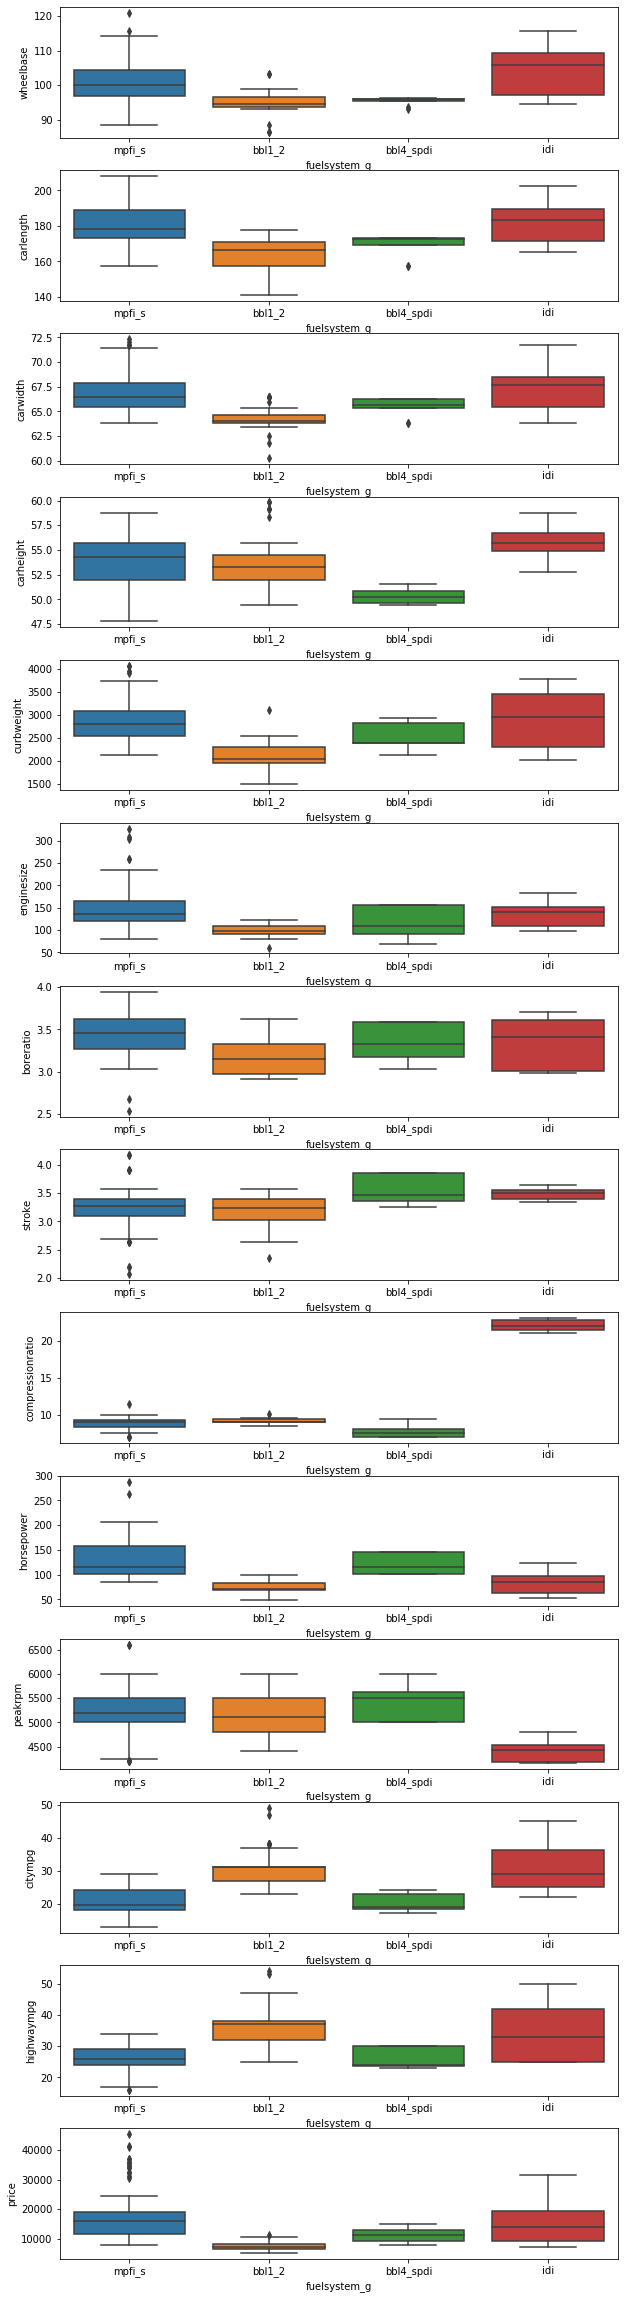

In [197]:
i=0
fig = plt.figure(figsize=(10, 900))
gs = grid.GridSpec(300,2,wspace=0.25, hspace=0.25)
for a in ['fuelsystem_g']:
    for b in data_num:
        sns.boxplot(data = data, x=a, y=b,ax=fig.add_subplot(gs[i,:]))
        i=i+1
plt.show()

In [198]:
data_cat.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'brandName'],
      dtype='object')